# Problem Statement

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, etc. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and why so that the bank can improve upon those areas.

As a Data scientist at Thera bank you need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

## Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

- **CLIENTNUM**: Client number. Unique identifier for the customer holding the account
- **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- **Customer_Age**: Age in Years
- **Gender**: Gender of the account holder
- **Dependent_count**: Number of dependents
- **Education_Level**:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- **Marital_Status**: Marital Status of the account holder
- **Income_Category**: Annual Income Category of the account holder
- **Card_Category**: Type of Card
- **Months_on_book**: Period of relationship with the bank
- **Total_Relationship_Count**: Total no. of products held by the customer
- **Months_Inactive_12_mon**: No. of months inactive in the last 12 months
- **Contacts_Count_12_mon**: No. of Contacts between the customer and bank in the last 12 months
- **Credit_Limit**: Credit Limit on the Credit Card
- **Total_Revolving_Bal**: The balance that carries over from one month to the next is the revolving balance
- **Avg_Open_To_Buy**: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
- **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
- **Total_Ct_Chng_Q4_Q1**: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- **Total_Amt_Chng_Q4_Q1**: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- **Avg_Utilization_Ratio**: Represents how much of the available credit the customer spent

## Table of Contents

- **<a href = #link1>Importing Libraries</a>**
- **<a href = #link2>Initial Data Overview</a>**
	- <a href = #link3>Initial Data Cleaning</a>
- **<a href = #link4>Exploratory Data Analysis</a>**
	- <a href = #link5>Defining Functions used for Analysis</a>
	- <a href = #link6>Numerical Data Distributions</a>
	- <a href = #link7>Numerical Data Correlations</a>
	- <a href = #link8>Categorical Data Distributions</a>
	- <a href = #link9>Categorical Data Correlations</a>
	- <a href = #link10>Target Variable Analysis</a>
- **<a href = #link11>EDA and Data Cleaning Summary</a>**
	- <a href = #link12>Data Cleaning Summary</a>
	- <a href = #link13>EDA Summary</a>
	- <a href = #link14>Target Variable Analysis</a>
- **<a href = #link15>Data Pre-Processing</a>**
	- <a href = #link16>Data Pre-Processing Summary</a>
	- <a href = #link17>Model Evaluation Criterion</a>
	- <a href = #link18>Defining Functions for Metric Evaluation</a>
- **<a href = #link19>Initial Model building</a>**
	- <a href = #link20>Model Building (Oversampled Data)</a>
	- <a href = #link21>Model Building (UnderSampling)</a>
	- <a href = #link22>Initial Model Comparison</a>
- **<a href = #link23>Model Tuning with Random Search CV</a>**
	- <a href = #link24>Tuning Random Forest Classifier</a>
		- <a href = #link25>Feature Importance for Random Forest</a>
	- <a href = #link26>Tuning Gradient Boosting Classifier</a>
		- <a href = #link27>Feature Importance for Gradient Boosting Classifier</a> 
	- <a href = #link28>Tuning XGBoost Classifier</a>
		- <a href = #link29>Feature Importance for XGBClassifier</a>
	- <a href = #link30>Final Tuned Model Comparisons</a>
- **<a href = #link31>Pipeline Production</a>**
	- <a href = #link32>Creating Preproccessor</a>
	- <a href = #link33>Creating Imputation Encoder</a>
	- <a href = #link34>Defining Models</a>
	- <a href = #link35>Running the Pipeline</a>
	- <a href = #link36>Pipeline Model Performance Comparison</a>
- **<a href = #link37>Conclusion</a>**
	- <a href = #link38>Final Model Overview</a>
	- <a href = #link39>Key Insights</a>
	- <a href = #link40>Business Reccomendations</a>

### <a id= 'link1'>Importing Libraries</a>

In [1]:
# Libraries for Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Imputation
from sklearn.impute import SimpleImputer

# Libraries for Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Libraries to split data and obtain metric scores
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# Libraries for Over and Under Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries for Model Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Libraries for Creating Pipelines and Personalizing Them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector as selector

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# Library to help visualize models predictions
import shap

# Initialize the package
shap.initjs()

# Setting Options
sns.set_theme(
    color_codes=True, style="darkgrid", context="talk", palette="hls", font_scale=0.75
)
%matplotlib inline
%load_ext nb_black
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Reading in the Data
df = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

### <a id= 'link2'>Initial Data Overview</a>

In [2]:
# Creating copy to preserve the original dataset
dfc = df.copy()

# Initial view of the data
print(f"There are {dfc.shape[0]} rows and {dfc.shape[1]} columns.")
np.random.seed(1)
dfc.sample(n=10)

There are 10127 rows and 21 columns.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,712389108,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,6,3,2,2570.000,2107,463.000,0.651,4058,83,0.766,0.820
9013,718388733,Existing Customer,38,F,1,College,NaN,Less than $40K,Blue,32,2,3,3,2609.000,1259,1350.000,0.871,8677,96,0.627,0.483
2053,710109633,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,6,3,2,9871.000,1061,8810.000,0.545,1683,34,0.478,0.107
3211,717331758,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,6,3,4,34516.000,2517,31999.000,0.765,4228,83,0.596,0.073
5559,709460883,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,5,2,4,1614.000,0,1614.000,0.609,2437,46,0.438,0.000
6106,789105183,Existing Customer,54,M,3,Post-Graduate,Single,$80K - $120K,Silver,42,3,1,2,34516.000,2488,32028.000,0.552,4401,87,0.776,0.072
4150,771342183,Attrited Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,40,6,3,2,1625.000,0,1625.000,0.689,2314,43,0.433,0.000
2205,708174708,Existing Customer,38,M,4,Graduate,Married,$40K - $60K,Blue,27,6,2,4,5535.000,1276,4259.000,0.636,1764,38,0.900,0.231
4145,718076733,Existing Customer,43,M,1,Graduate,Single,$60K - $80K,Silver,31,4,3,3,25824.000,1170,24654.000,0.684,3101,73,0.780,0.045
5324,821889858,Attrited Customer,50,F,1,Doctorate,Single,abc,Blue,46,6,4,3,1970.000,1477,493.000,0.662,2493,44,0.571,0.750


<IPython.core.display.Javascript object>

Observations:
- CLIENTNUM is an unique ID number and can be dropped
- Attrition_Flag is target variable. We're looking to identify the profile of customers that are flaged as *attrited* i.e. they have closed their account.
    - This will need to be changed to boolean dtype 0: "Existing", 1: "Attrited"
- Income data is inconsistent in formatting, this will need to be cleaned prior to analysis

In [3]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

Observations:
- Education and Marital Status are missing a considerable amount of information
- Object dtypes need to be converted to categorical or boolean dtypes
- Majority of columns are numerical

**<a id= 'link3'>Initial Data Cleaning</a>**

In [4]:
# Dropping CLIENTNUM column
dfc.drop("CLIENTNUM", axis=1, inplace=True)

# Reformatting column names
dfc.rename(
    columns={
        "Attrition_Flag": "Target",
        "Customer_Age": "Age",
        "Dependent_count": "Dependants",
        "Education_Level": "Education",
        "Marital_Status": "Married",
        "Income_Category": "Income",
        "Card_Category": "Card_Type",
        "Total_Relationship_Count": "Product_Total",
        "Months_Inactive_12_mon": "Months_Inactive",
        "Contacts_Count_12_mon": "Contact",
        "Total_Revolving_Bal": "Rolling_Balance",
        "Avg_Open_To_Buy": "Credit_Remaining",
        "Avg_Utilization_Ratio": "Utilization_Ratio",
    },
    inplace=True,
)

# Converting object dtype to categorical
cat_cols = [
    "Target",
    "Gender",
    "Dependants",
    "Education",
    "Married",
    "Income",
    "Card_Type",
    "Product_Total",
    "Months_Inactive",
    "Contact",
]

for colname in cat_cols:
    dfc[colname] = dfc[colname].astype("category")

# Encoding Target variable with 0 and 1
dfc.Target.replace({"Attrited Customer": "1", "Existing Customer": "0"}, inplace=True)

<IPython.core.display.Javascript object>

In [5]:
# Viewing Unique values for Income
dfc.Income.unique()

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'abc']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'abc']

<IPython.core.display.Javascript object>

The unique values are actually fairly consistent. However, "abc" does not make any sense in this case. Let's replace this value with NaN. The missing values will be imputed during the modeling building phase.

In [6]:
# Reformatting variables in Income column
dfc.Income.replace(
    {
        "abc": np.nan,
        "Less than $40K": "40K or less",
        "$40K - $60K": "40K - 60K",
        "$60K - $80K": "60K - 80K",
        "$80K - $120K": "80K - 120K",
        "$120K +": "$120K or more",
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

In [7]:
# Viewing Unique values for Married column
dfc.Married.unique()

['Married', 'Single', NaN, 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']

<IPython.core.display.Javascript object>

The unqiue values for married all make sense. Imputation of the missing values will be decided during the model building phase.

### <a id= 'link4'>Exploratory Data Analysis</a>

**<a id= 'link5'>Defining Functions used for Analysis</a>**

In [8]:
# Function for histogram and boxplot distribution comparison
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="r"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [9]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [10]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [11]:
# function to plot distributions sorted by target variable
def distribution_plot_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**<a id= 'link6'>Numerical Data Distributions</a>**

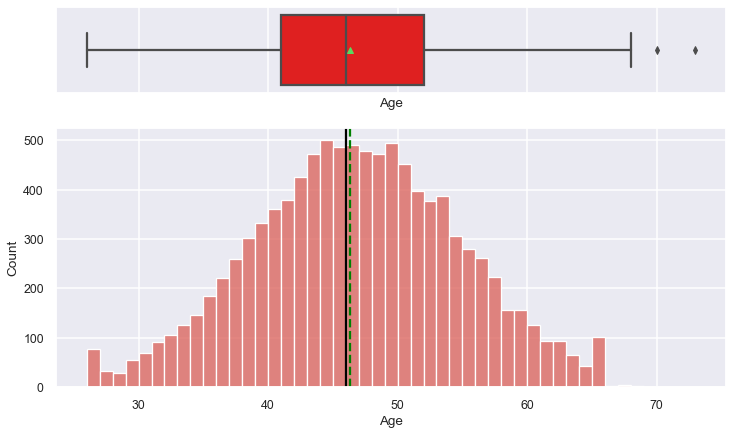

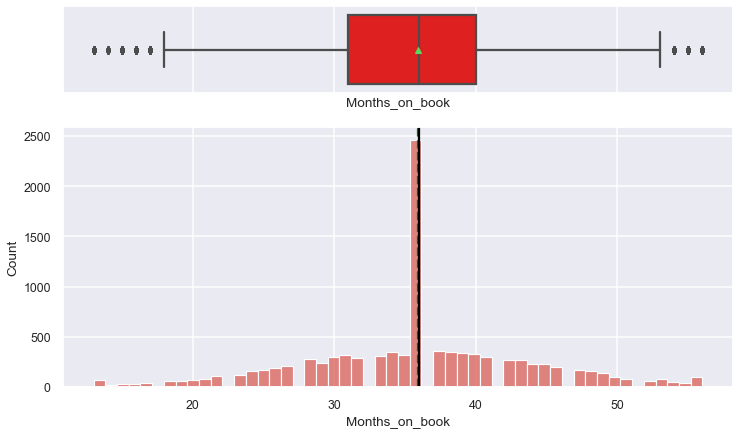

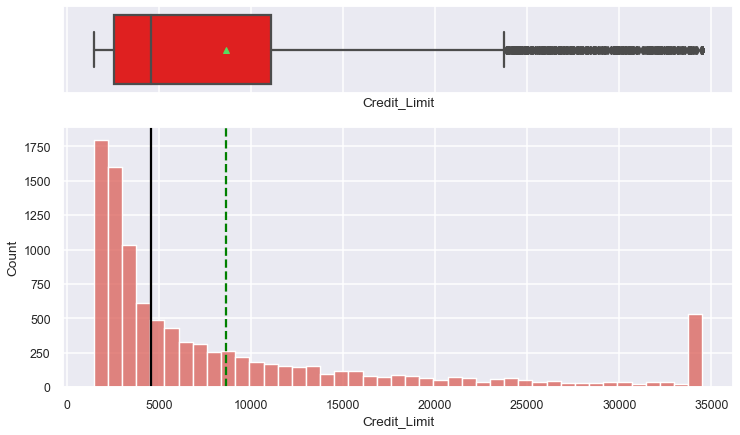

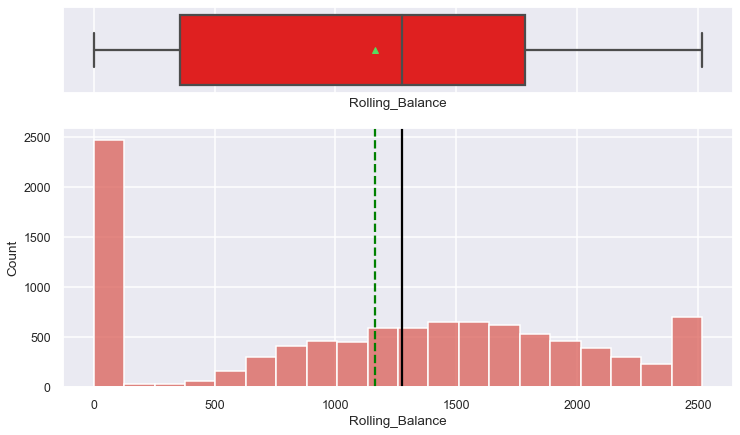

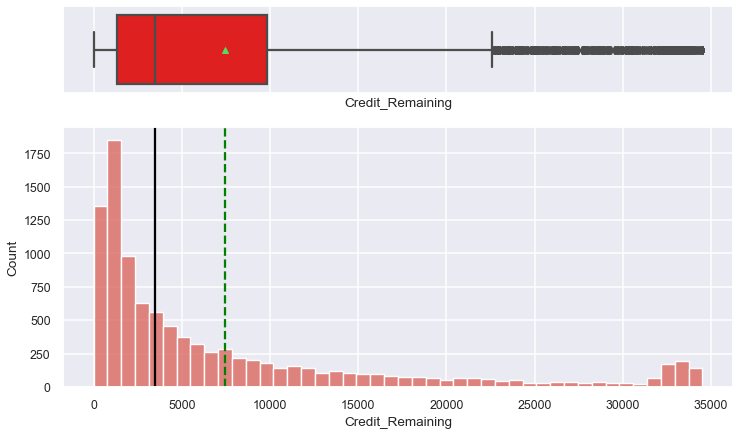

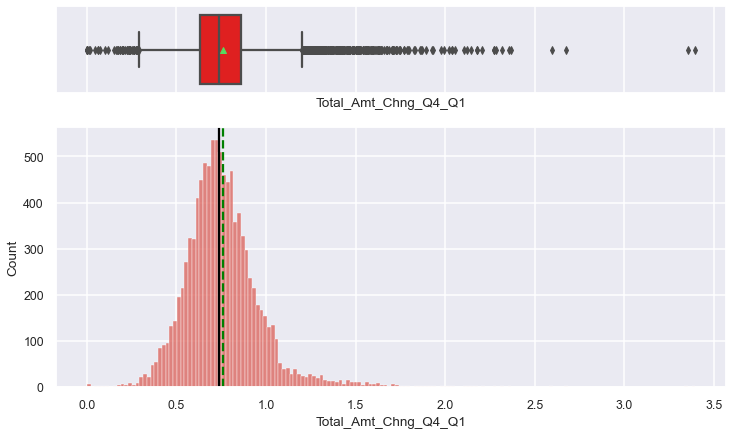

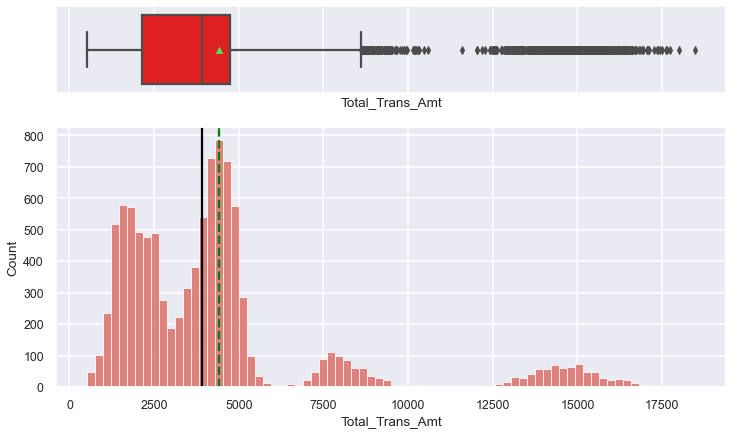

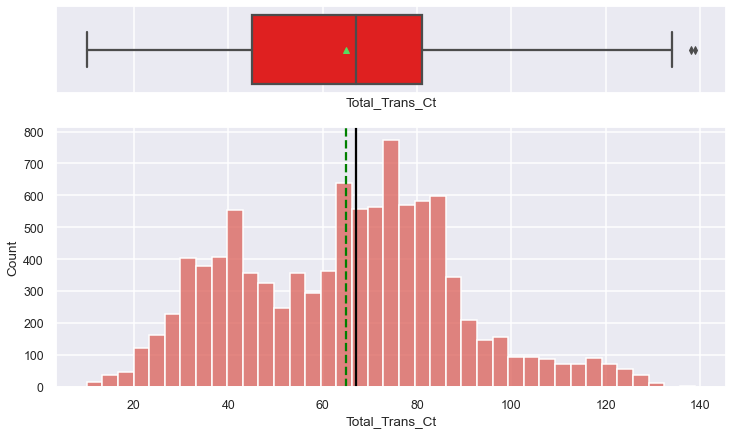

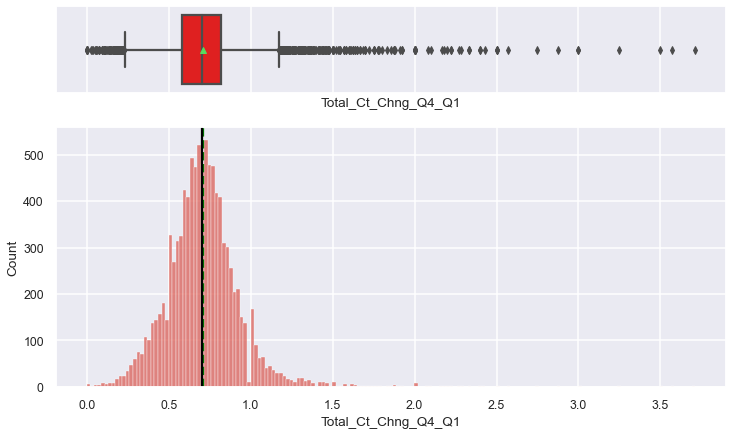

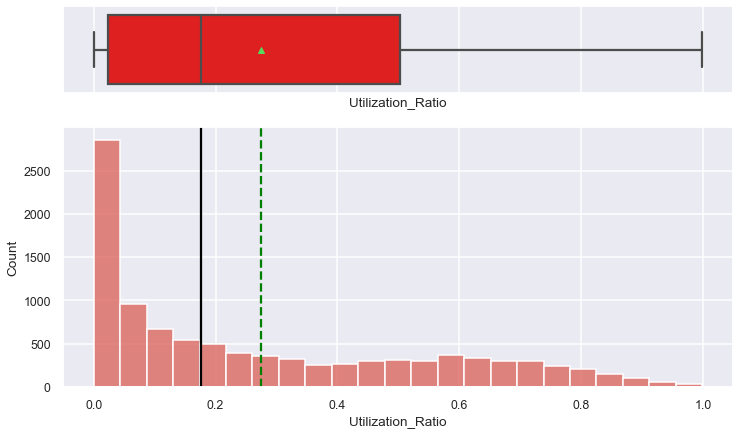

<IPython.core.display.Javascript object>

In [12]:
# Defining numerical cols
num_cols = [
    "Age",
    "Months_on_book",
    "Credit_Limit",
    "Rolling_Balance",
    "Credit_Remaining",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Utilization_Ratio",
]

for colname in dfc[num_cols]:
    hist_box(data=dfc, feature=colname)

In [13]:
dfc[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Rolling_Balance,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Credit_Remaining,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.000,0.760,0.219,0.000,0.631,0.736,0.859,3.397
Total_Trans_Amt,10127.000,4404.086,3397.129,510.000,2155.500,3899.000,4741.000,18484.000
Total_Trans_Ct,10127.000,64.859,23.473,10.000,45.000,67.000,81.000,139.000
Total_Ct_Chng_Q4_Q1,10127.000,0.712,0.238,0.000,0.582,0.702,0.818,3.714
Utilization_Ratio,10127.000,0.275,0.276,0.000,0.023,0.176,0.503,0.999


<IPython.core.display.Javascript object>

Observations:
- Age is normally distributed
    - Range from 26 - 73
- Months on book is normally distributed
    - Vast majority of customers have been with the bank for 36 months (3 years)
        - This large spike is suspect, it appears as if the missing data points have been imputed beforehand?
    - Range from 13 - 56
- Credit limit is features a high left skew with a heavy right tail
    - There is an extreme amount of outliers, but all of them appear to be within the distribution
        - Log transformation may help with model building and correlations
    - There is a spike in the credit limit at 35,000
    - Range from 1,400 - 35,000
- Rolling balance is mostly normally distributed with high spikes on either end
    - Range from 0 - 2,500
    - There is a significant portion of customers who do not have credit left over at the end of the month
- Credit Remaining features the same distribution as credit limit
    - Range from 3 - 35,000
    - Distribution matches with observations from rolling balance
- Total amount change from Q4 to Q1 appears normally distributed with a heavy amount of outliers on either side
    - Majority of customers appear to spend about 25% less than during the Q4. This makes sense as many people cutback on spending after the winter holidays are completed.
- Total transaction amount features 4 different peaks across its distribution
    - This most likely correlates with the different income brackets
    - It may be useful to seperate the various distributions into their own features
- Total transaction count appears normally distributed
    - range from 10 to 81 with an average of 64
- Total count change from Q4 to Q1 is normally distrbutted with a heavy amount of outliers on either side
    - Distribution lines up with observations made on Total amount change from Q4 - Q1
- Utilization Ratio appears uniformly distributted with a high spike at 0
    - This implies that a significant portion of customers are not using their credit card at all
        - The average use is pulled down because of this
        - Log transformation may help with model building and correlations

**<a id= 'link7'>Numerical Data Correlations</a>**

In [14]:
# Performing log transformations on skewed distributions
dfc_log = dfc.copy()
dfc_log[["Utilization_Ratio_Log", "Credit_Limit_Log", "Credit_Remaining_Log"]] = np.log(
    dfc[["Utilization_Ratio", "Credit_Limit", "Credit_Remaining"]]
)
dfc_log.drop(
    ["Utilization_Ratio", "Credit_Limit", "Credit_Remaining"], axis=1, inplace=True
)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

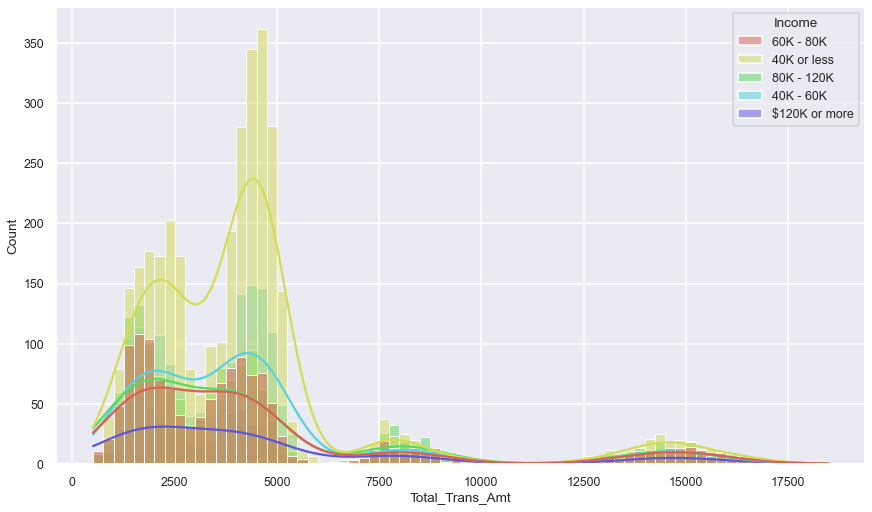

<IPython.core.display.Javascript object>

In [15]:
# Checking total transaction amount against income brackets
fig = plt.figure(figsize=(12, 7), constrained_layout=True)
spec = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(spec[0, 0])

sns.histplot(data=dfc, x="Total_Trans_Amt", hue="Income", kde=True, ax=ax1)

There is no significant difference in distribution across income brackets. However, it may still be useful to bin the data into categorical brackets for model building.

<AxesSubplot:>

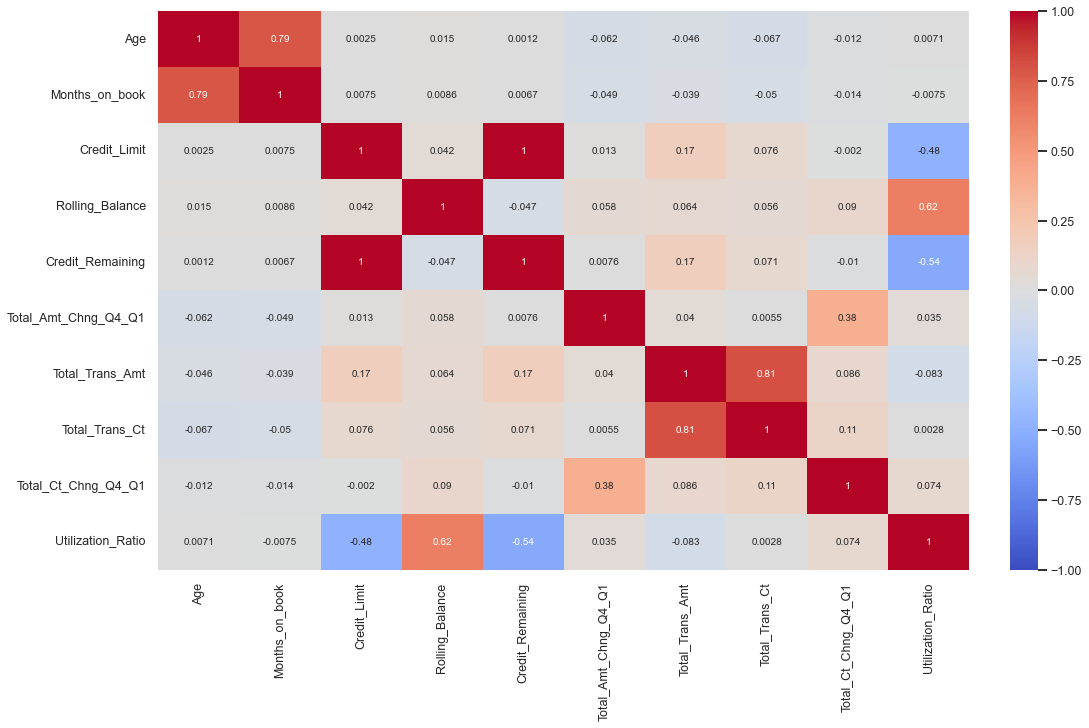

<IPython.core.display.Javascript object>

In [16]:
# Initial heatmap with no log transformations
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(spec[0, 0])

heatmap = sns.heatmap(dfc.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", ax=ax1)
heatmap

<AxesSubplot:>

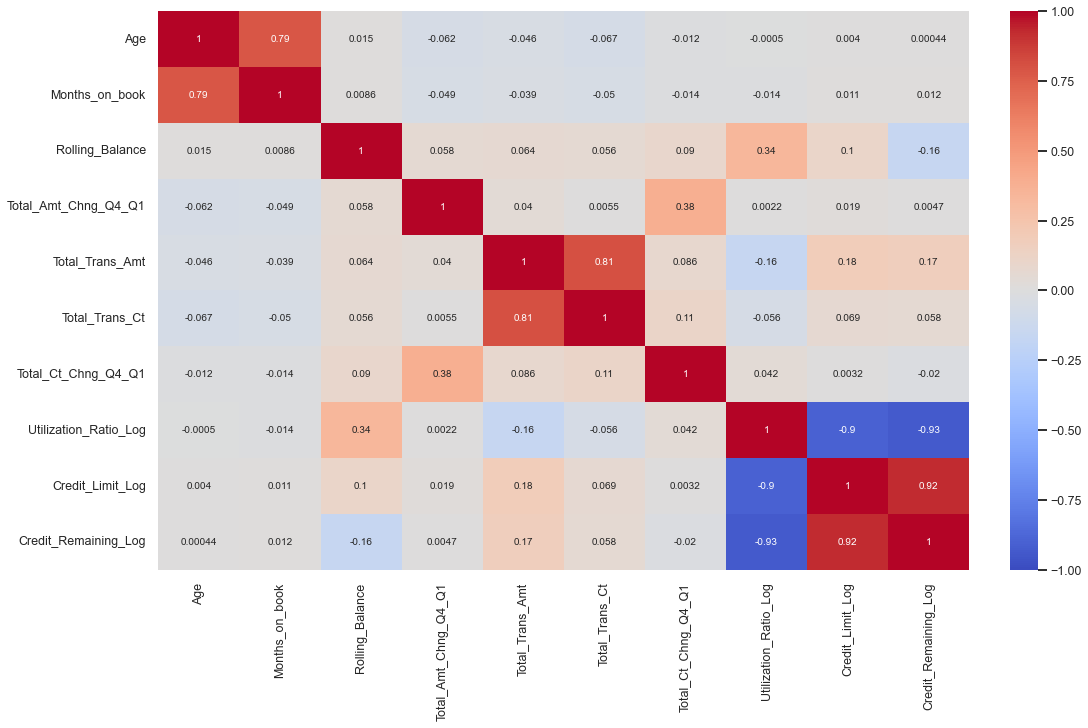

<IPython.core.display.Javascript object>

In [17]:
# Heatmap WITH log transformations
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(spec[0, 0])

heatmap = sns.heatmap(
    dfc_log.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", ax=ax1
)
heatmap

Log transformations have helped bring out more correlations within the data set. Thus, we'll make our observations based on these improved correlations.

Observations:
- Age and Months_on_Book feature a high positive correlation
- Rolling_Balance and Utilization ratio have a mild positive correlation
- Total Amount/Count change fomr Q4 to Q1 have a mild positive correlation
- Total transaction amount/count featurea high positive correlation
- Utilization ratio has a mild positive correlation with rolling balance
- Credit limit and credit remaining are highly negativly correlated with utilization ratio
    - i.e. When credit limit and credit remaining are lower, the utilization ratio is higher
- Credit limit and credit remaining are almost entirely correlated. Therefore, we can drop either column as the information is redundant for our model building and data analysis.

In [18]:
# Dropping credit remaining column from df and num_cols due to redundancy
dfc.drop("Credit_Remaining", axis=1, inplace=True)
num_cols.remove("Credit_Remaining")

<IPython.core.display.Javascript object>

**<a id= 'link8'>Categorical Data Distributions</a>**

In [19]:
# Creating bins for Total Transaction Amount
dfc["Total_Trans_Amt_bin"] = pd.cut(
    dfc["Total_Trans_Amt"],
    [0, 2700, 5500, 7500, 12000, 19000],
    labels=["2.7K or less", "2.7K-5.5K", "5.5K-7.5K", "7.5K to 12K", "12K or more"],
)

# Removing redundant column now that transformation is complete
dfc.drop("Total_Trans_Amt", axis=1, inplace=True)
num_cols.remove("Total_Trans_Amt")

# Adding binned transaction variable to categorical columns list
cat_cols.append("Total_Trans_Amt_bin")

# Verifying Results
dfc["Total_Trans_Amt_bin"].value_counts(dropna=False)

2.7K-5.5K       5038
2.7K or less    3599
12K or more      746
7.5K to 12K      568
5.5K-7.5K        176
Name: Total_Trans_Amt_bin, dtype: int64

<IPython.core.display.Javascript object>

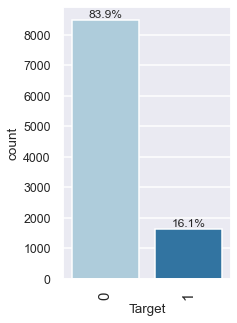

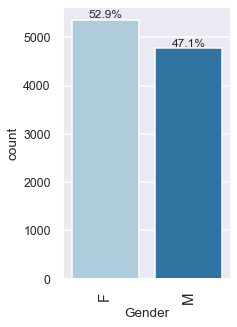

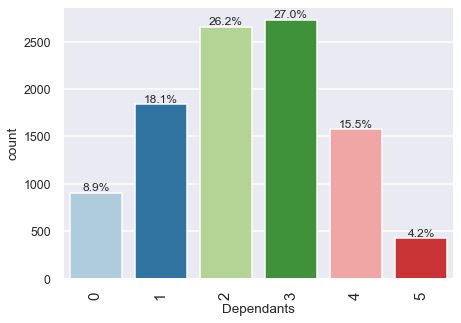

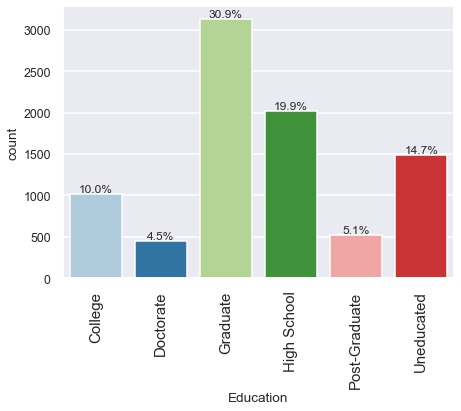

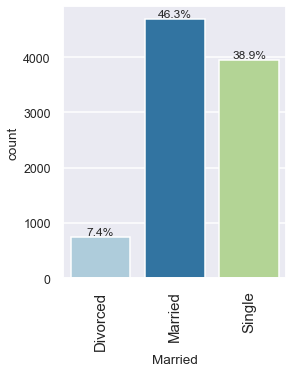

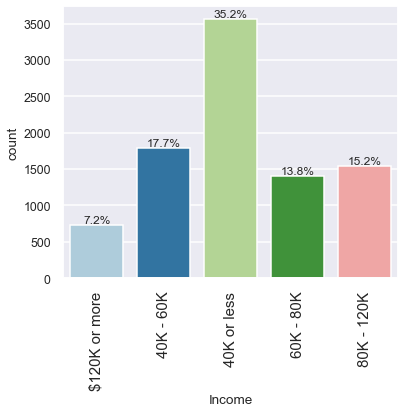

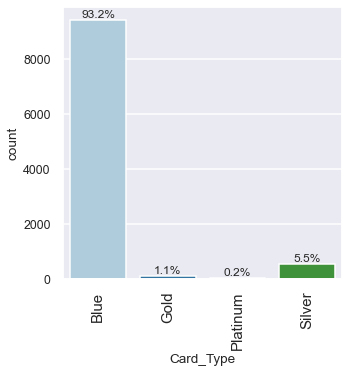

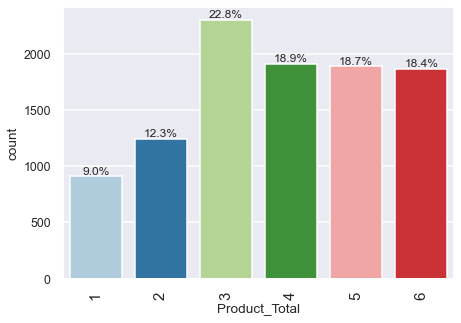

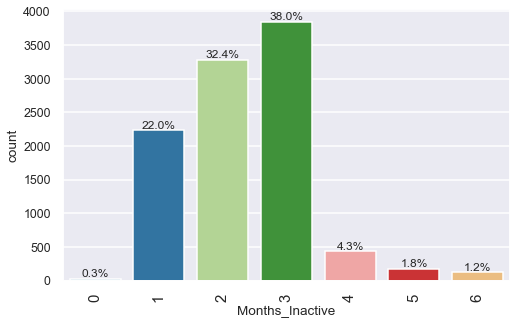

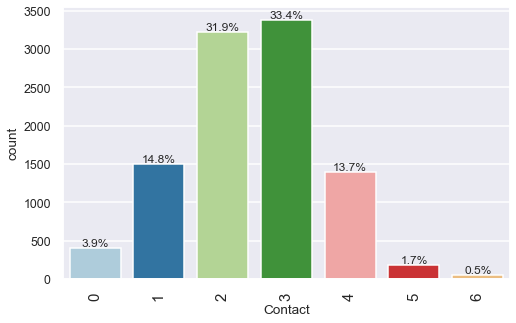

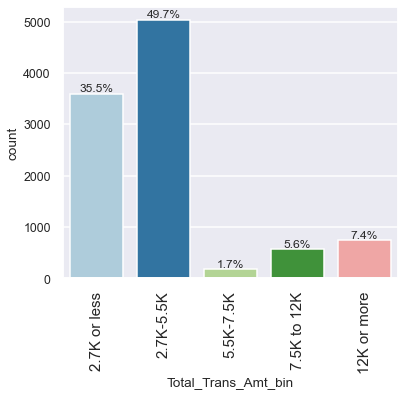

<IPython.core.display.Javascript object>

In [20]:
for colname in dfc[cat_cols]:
    labeled_barplot(data=dfc, feature=colname, perc=True)

Observations:

- 16% of customers no longer use their credit cards
- Gender is split nearly 50/50
- Number of dependants is normally distributed, 87% customers have between 1-4
- 30% of customers have a graduate degree, 50% have some form of higher level education, only 15% are undereducated
    - 15% of customers declined to enter their educational level, this will need to be dealt with...
- Nearly 50% of customers are married, 40% are single, very few are divorced
- A third of all customers make 40K or less annually, half make between 40-120k annually
- 93% of customers have Blue credit card, only 5.5% have a Silver
    - We'll combine gold and platinum into an 'other' category
- 80% of customers have 3 or more products with the bank
- 92% of all customers are inactive between 1 and 3 months every year
- 64% of customers have been in contact with the bank 2-3 times during the year
- 50% of customers spend between 2.7-5.5K with their credit card during the year, 35% spend 2.7k or less, and the remaining brackets make up the last 15%

In [21]:
# Combining Gold and Platinum Card Types into "Other"
for col_val in dfc[["Card_Type"]]:
    val = dfc[col_val].value_counts(normalize=True)
    y = val[val < 0.05].index
    dfc[col_val] = dfc[col_val].replace({x: "Other" for x in y})

# Combining 4, 5, and 6 months inactive into "4 or more"
# This will also add those with 0 months of inactivity
# This shouldn't be a problem however since it only contains 29 data points out of the 10k present in the dataset
for col_val in dfc[["Months_Inactive"]]:
    val = dfc[col_val].value_counts(normalize=True)
    y = val[val < 0.05].index
    dfc[col_val] = dfc[col_val].replace({x: "4 or more" for x in y})

<IPython.core.display.Javascript object>

**<a id= 'link9'>Categorical Data Correlations</a>**

<AxesSubplot:>

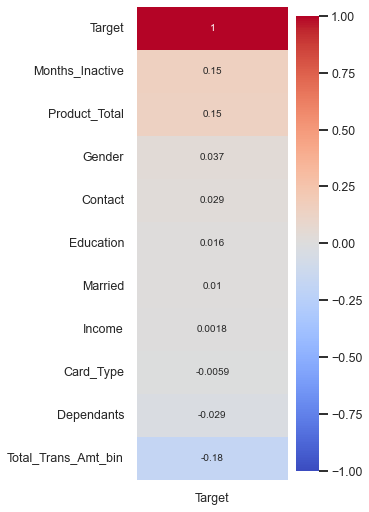

<IPython.core.display.Javascript object>

In [22]:
# Visualizing categorical correlations to the target variable
fig = plt.figure(figsize=(5, 7), constrained_layout=True)
spec = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(spec[0, 0])

# Creating seperate df for categorical variables only
dfc_cat = dfc[cat_cols]

# Assigning the heatmap function to variable
heatmap = sns.heatmap(
    dfc_cat.apply(lambda x: pd.factorize(x)[0])
    .corr(method="pearson", min_periods=1)[["Target"]]
    .sort_values(by="Target", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="coolwarm",
)
heatmap

Observations:
- Months_Inactive and Product_Total have a slight positive correlation
- Total_Trans_Amt_bin has a slight negative correlation
- All other variables do not appear to have significant correlations

**<a id= 'link10'>Target Variable Analysis</a>**

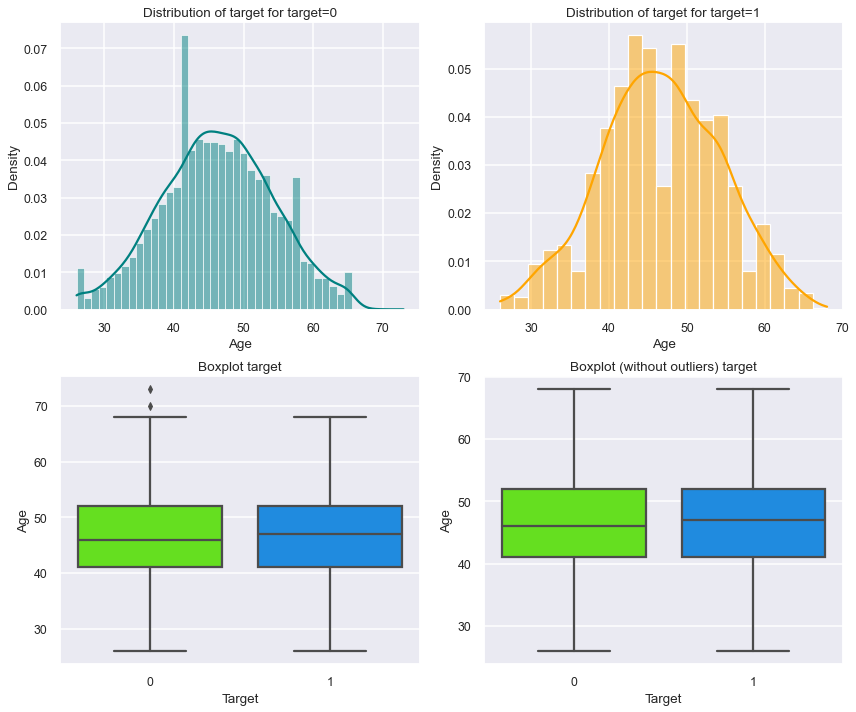

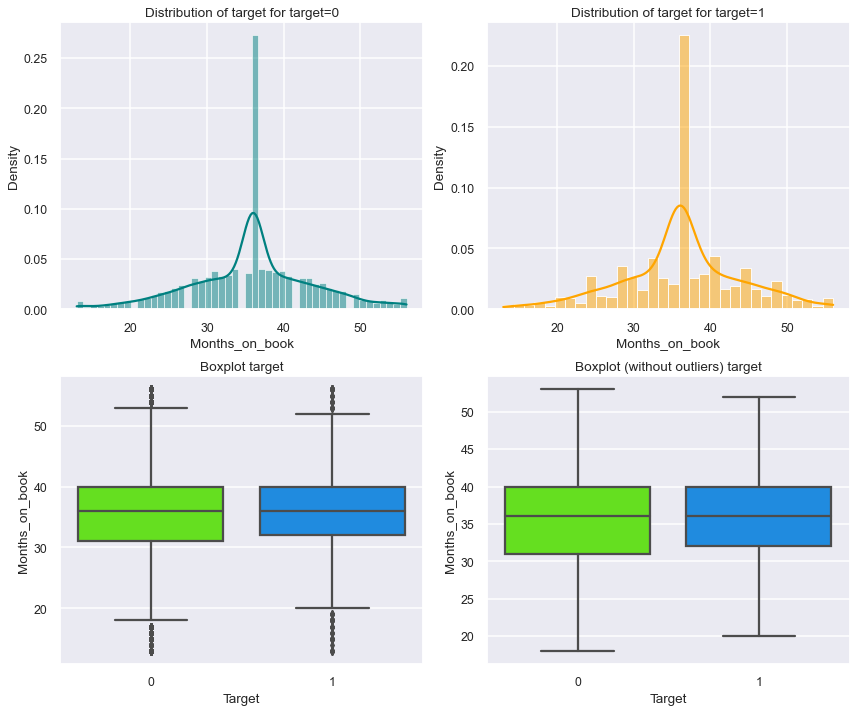

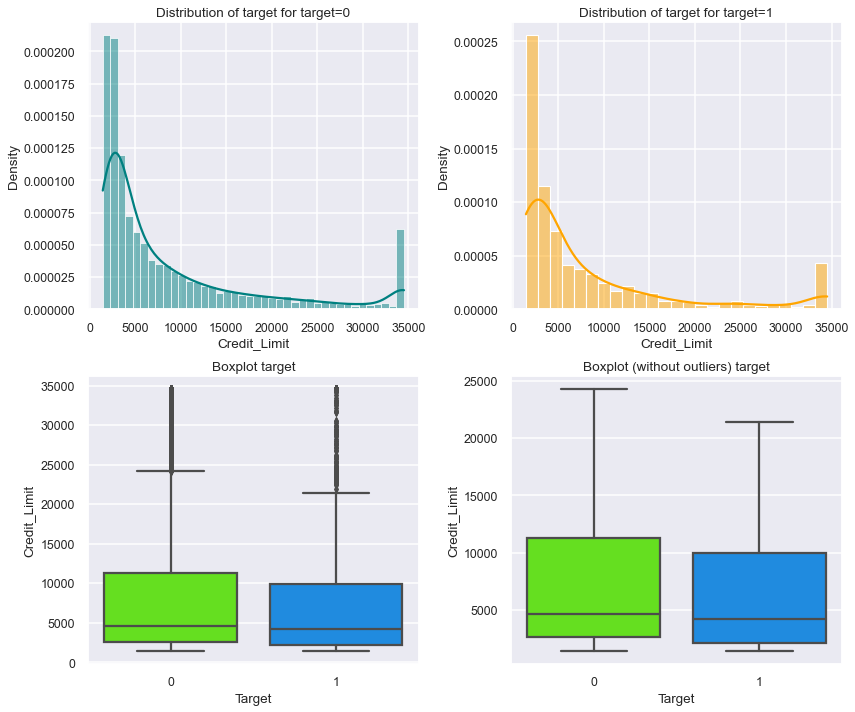

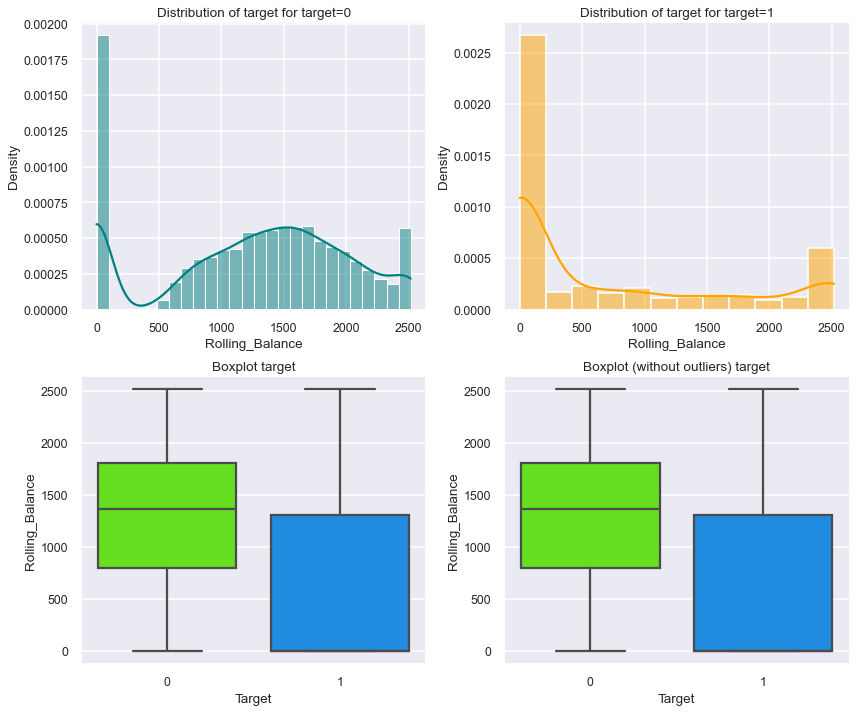

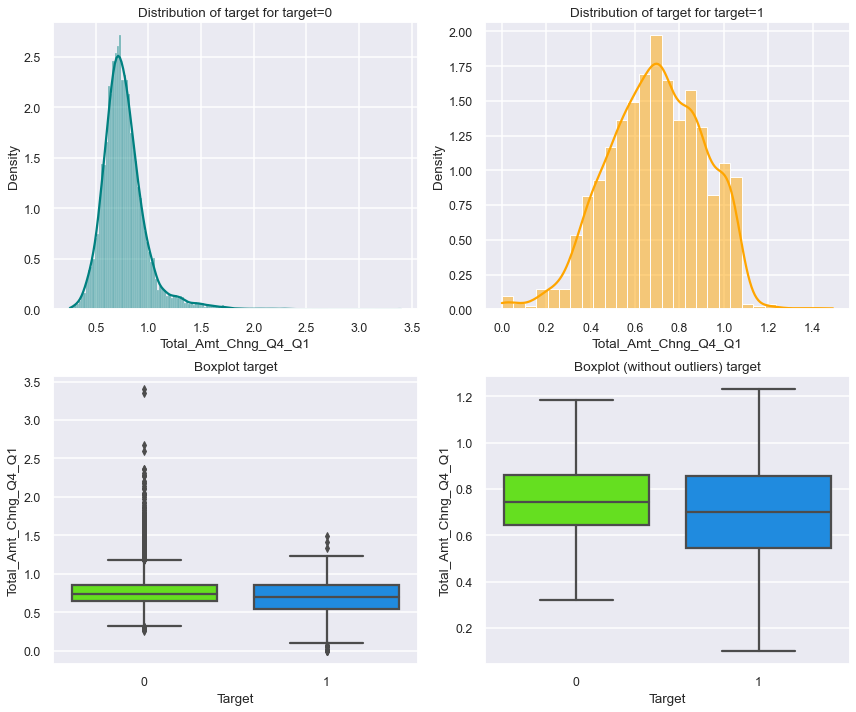

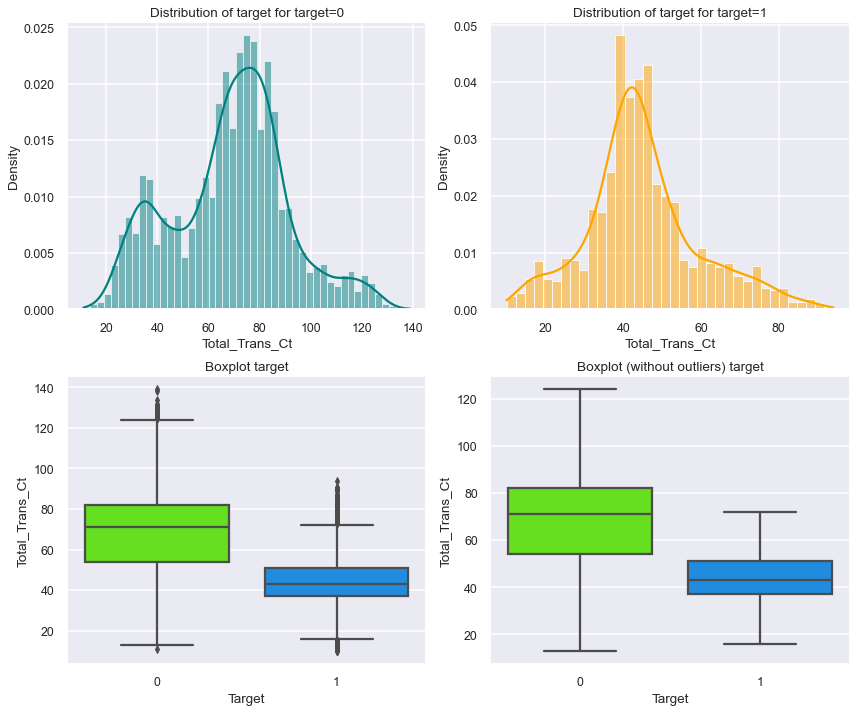

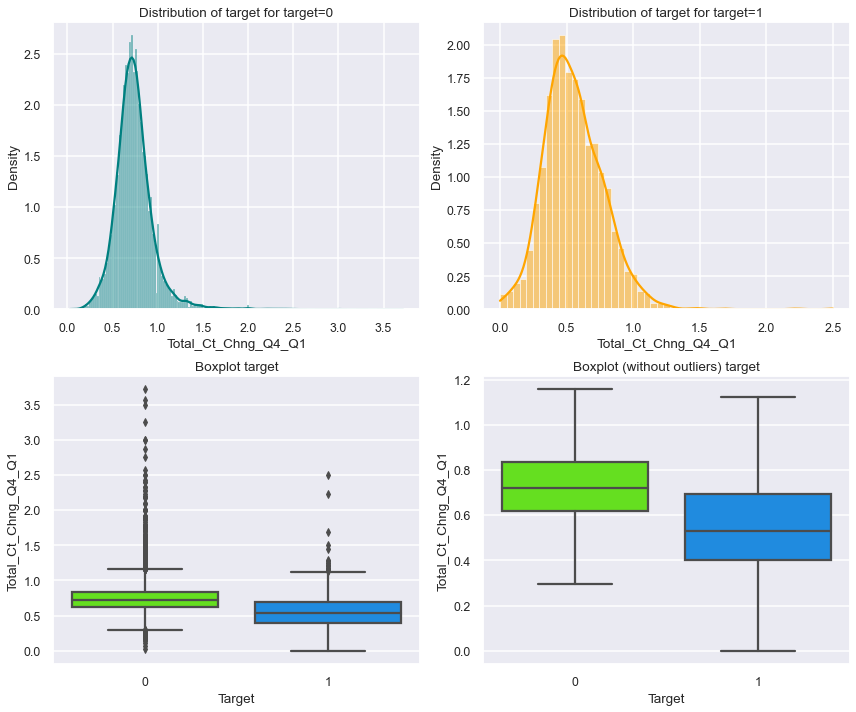

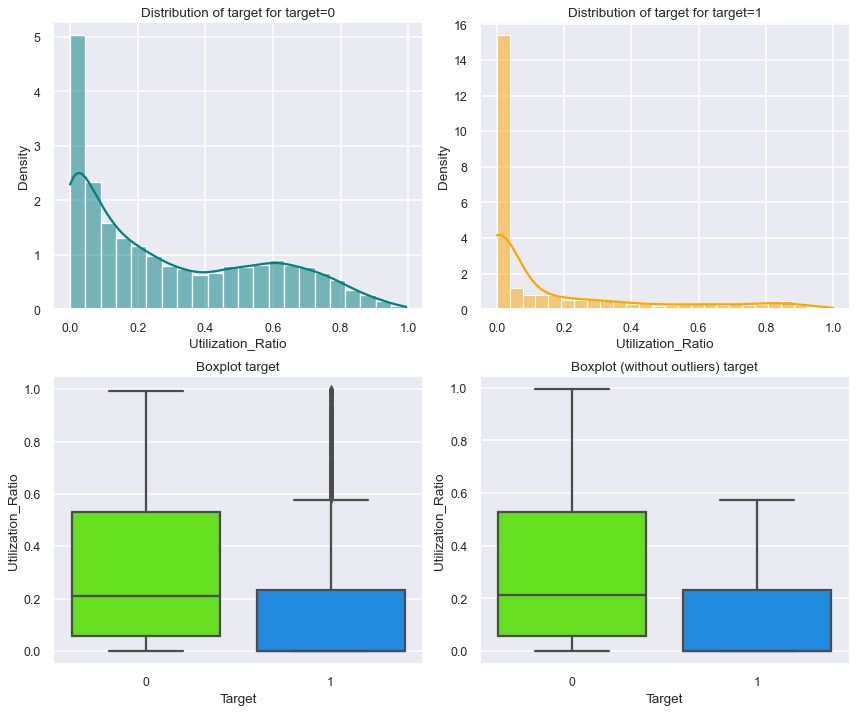

<IPython.core.display.Javascript object>

In [23]:
for colname in dfc[num_cols]:
    distribution_plot_target(data=dfc, predictor=colname, target="Target")

Observations:
- Age, Months_on_book, Total_Amount_Change_Q4_Q1 *is not* a significant variable in determining attrition
- The credit limit for those who leave the bank is *marginally* lower than those who do not
- The rolling balance for those who leave the bank is *significantly* lower than those who do not
- Customers who have a lower total transaction amount are more likely to leave the bank
    - Similarly those who have a lower total transaction count are also more likely to leave the bank
- The total count change from Q4 to Q1 is *moderately* lower for those that leave the bank
- The utilization ratio of those leave the bank does not exceed 20% of their credit limit on average

Target     0     1    All
Gender                   
All     8500  1627  10127
F       4428   930   5358
M       4072   697   4769
------------------------------------------------------------------------------------------------------------------------


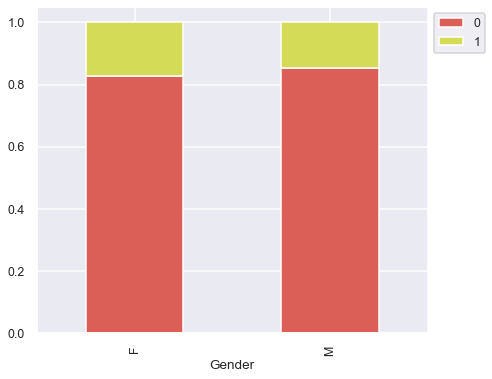

Target         0     1    All
Dependants                   
All         8500  1627  10127
3           2250   482   2732
2           2238   417   2655
1           1569   269   1838
4           1314   260   1574
0            769   135    904
5            360    64    424
------------------------------------------------------------------------------------------------------------------------


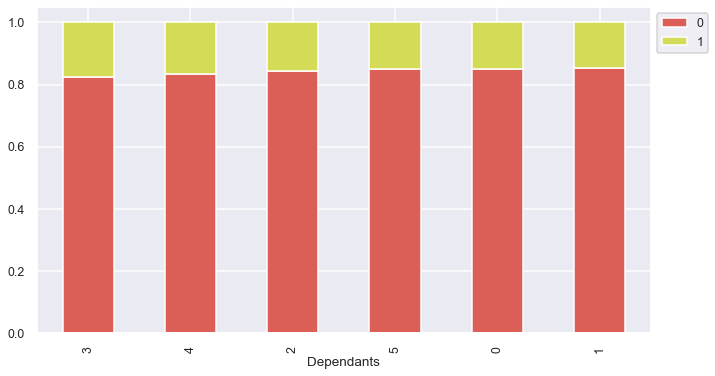

Target            0     1   All
Education                      
All            7237  1371  8608
Graduate       2641   487  3128
High School    1707   306  2013
Uneducated     1250   237  1487
College         859   154  1013
Doctorate       356    95   451
Post-Graduate   424    92   516
------------------------------------------------------------------------------------------------------------------------


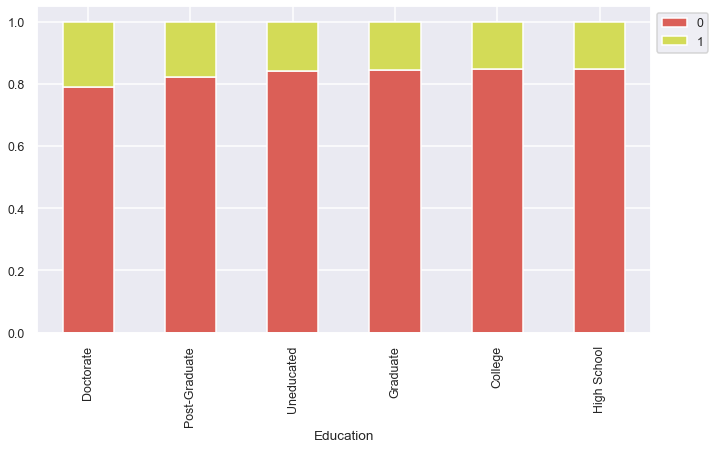

Target       0     1   All
Married                   
All       7880  1498  9378
Married   3978   709  4687
Single    3275   668  3943
Divorced   627   121   748
------------------------------------------------------------------------------------------------------------------------


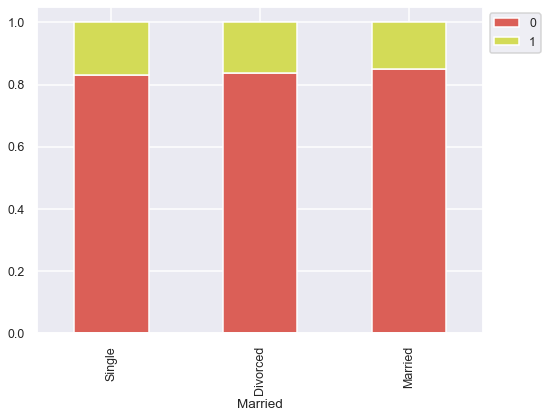

Target            0     1   All
Income                         
All            7575  1440  9015
40K or less    2949   612  3561
40K - 60K      1519   271  1790
80K - 120K     1293   242  1535
60K - 80K      1213   189  1402
$120K or more   601   126   727
------------------------------------------------------------------------------------------------------------------------


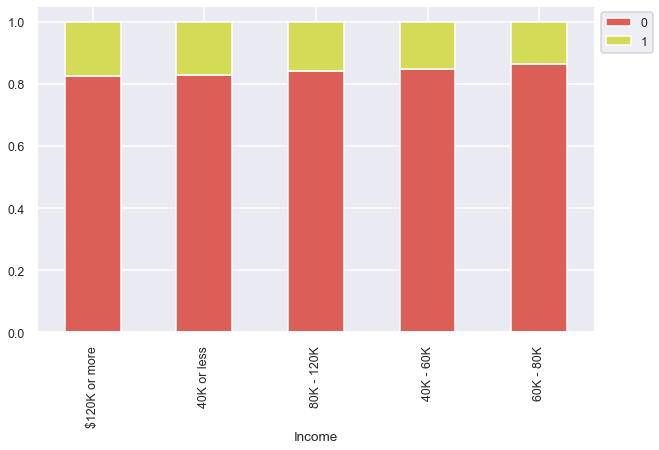

Target        0     1    All
Card_Type                   
All        8500  1627  10127
Blue       7917  1519   9436
Silver      473    82    555
Other       110    26    136
------------------------------------------------------------------------------------------------------------------------


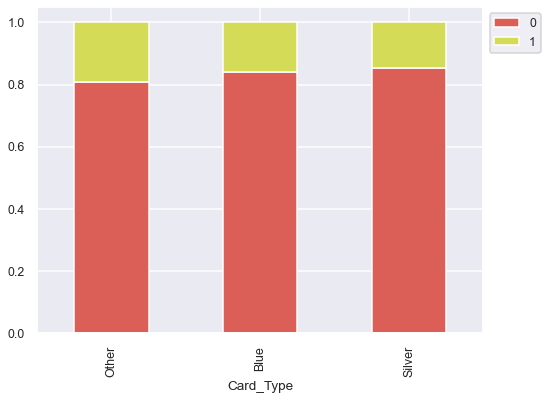

Target            0     1    All
Product_Total                   
All            8500  1627  10127
3              1905   400   2305
2               897   346   1243
1               677   233    910
5              1664   227   1891
4              1687   225   1912
6              1670   196   1866
------------------------------------------------------------------------------------------------------------------------


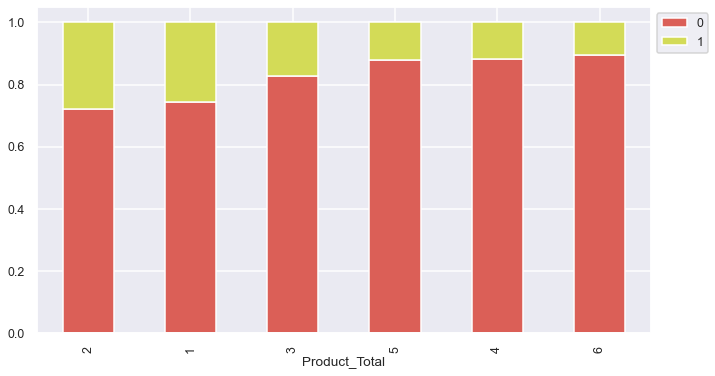

Target              0     1    All
Months_Inactive                   
All              8500  1627  10127
3                3020   826   3846
2                2777   505   3282
4 or more         570   196    766
1                2133   100   2233
------------------------------------------------------------------------------------------------------------------------


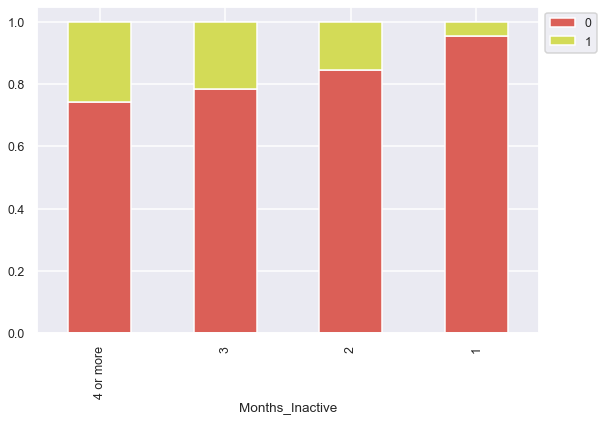

Target      0     1    All
Contact                   
All      8500  1627  10127
3        2699   681   3380
2        2824   403   3227
4        1077   315   1392
1        1391   108   1499
5         117    59    176
6           0    54     54
0         392     7    399
------------------------------------------------------------------------------------------------------------------------


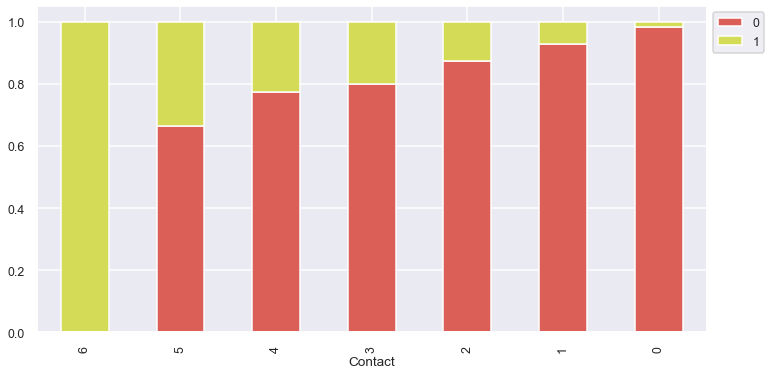

Target                  0     1    All
Total_Trans_Amt_bin                   
All                  8500  1627  10127
2.7K or less         2424  1175   3599
2.7K-5.5K            4822   216   5038
7.5K to 12K           375   193    568
5.5K-7.5K             133    43    176
12K or more           746     0    746
------------------------------------------------------------------------------------------------------------------------


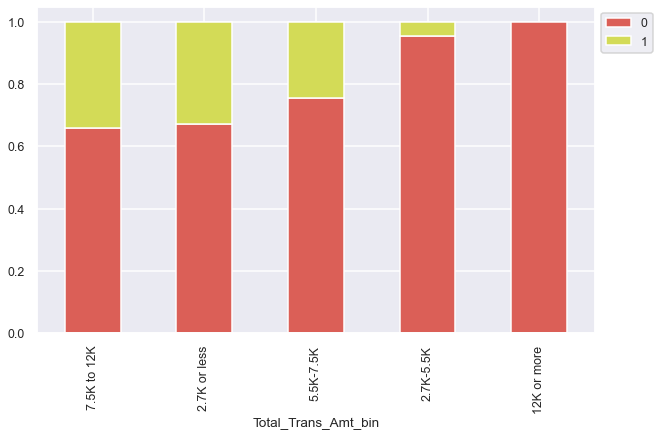

<IPython.core.display.Javascript object>

In [24]:
# Removing target variable from analysis against itself
cat_cols.remove("Target")

for colname in dfc[cat_cols]:
    stacked_barplot(data=dfc, predictor=colname, target="Target")

Observations:
- Gender, Dependants, Marital Status, and Income do not appear to be significant variables
- Customers with doctoral degrees appear marginally more likely to leave the bank
- Those with platinum and gold cards appear marginally more likely to leave the bank
    - Less than 5% of customers own these card types
- The more products owned the less likely the customer to leave the bank
- The longer the inactivity continues the more likely the customer is to leave the bank
- The likelihood increases significantly with each additional contact with the bank
- Total transactions amounts of 7.5K-12k and 2.7K or less are significantly more likely to leave the bank than other transaction groups

### <a id= 'link11'>EDA and Data Cleaning Summary</a>

**<a id= 'link12'>Data Cleaning Summary</a>**
- Reformmated majority of column names
- Performed log transformation on Credit Limit, Credit Remaining, and Utilization Ratio
    - Dropped Credit Remaining due to high correlation with Credit Limit creating a redundancy
- Converted all object dtypes to categorical
- Combined 4, 5, and 6 months_inactive into one variable "4 or more"
- Combined Gold and Platinum card_types into one variable "other"
- Total Transaction amounts was turned into a binned categorical variable from a continuous data set
- **NOTE**: Missing value imputation will be saved for data preprocessing

**<a id= 'link13'>EDA Summary</a>**

- **Age**
    - Age is normally distributed with a range from 26 - 73
    - Age and Months_on_Book feature a high positive correlation. This makes sense as banking needs are a lifelong commitment towards financial health.


- **Gender**
    - Gender is split nearly 50/50


- **Dependants**
    - Number of dependants is normally distributed, 87% customers have between 1-4


- **Education**
    - 30% of customers have a graduate degree, 50% have some form of higher level education, only 15% are undereducated
    - 15% of customers declined to enter their educational level


- **Married**
    - Nearly 50% of customers are married, 40% are single, very few are divorced


- **Income**
    - A third of all customers make 40K or less annually, half make between 40-120k annually


- **Card_Type**
    - 93% of customers have a Blue credit card, only 5.5% have a Silver


- **Months_on_book**
    - Months on book is normally distributed with a range from 13-56
    - Vast majority of customers have been with the bank for 36 months (3 years)


- **Product_Total**
    - 80% of customers have 3 or more products with the bank


- **Months_Inactive**
    - 92% of all customers are inactive between 1 and 3 months every year


- **Contact**
    - 64% of customers have been in contact with the bank 2-3 times during the year


- **Credit_Limit**
    - Credit limit features a typical extreme left skew with a heavy right tail
    - There is an extreme amount of outliers, but all of them appear to be within a typical distribution for this type of data
    - There is a spike in the credit limit at 35,000
    - Range from 1,400 - 35,000


- **Rolling_Balance**
    - Rolling_Balance and Utilization ratio have a mild positive correlation
    - Rolling balance is mostly normally distributed with high spikes on either end
    - Range from 0 - 2,500
    - There is a significant portion of customers who do not have credit left over at the end of the month


- **Total_Amt_Chng_Q4_Q1**
    - Total Amount/Count change from Q4 to Q1 have a mild positive correlation
    - Total amount change from Q4 to Q1 appears normally distributed with a heavy amount of outliers on either side
    - Majority of customers appear to spend about 25% less than during the Q4. This makes sense as many people cutback on spending after the winter holidays are completed.


- **Total_Trans_Ct**
    - Total transaction amount/count features high positive correlation
    - Total transaction count appears normally distributed
    - Range from 10 to 81 with an average of 64


- **Total_Ct_Chng_Q4_Q1**
    - Total count change from Q4 to Q1 is normally distrbutted with a heavy amount of outliers on either side
    - Distribution lines up with observations made on Total amount change from Q4 - Q1


- **Utilization_Ratio**
    - Utilization Ratio appears uniformly distributted with a high spike at 0
    - This implies that a significant portion of customers are not using their credit card at all
    - The average use is pulled down significantly because of this


- **Total_Trans_Amt_bin**
    - Total transaction amount features 4 different peaks across its distribution
    - These various peaks appear normally distributed by themselves
    - 50% of customers spend between 2.7-5.5K with their credit card during the year, 35% spend 2.7k or less, and the remaining spending brackets make up the last 15%


**<a id= 'link14'>Target Variable Analysis</a>**

There several variables that do not appear to have any bearing on determing the likelihood of attrition. Those variables include:
- Gender, Dependants, Marital Status, Income, Age, Months_on_book, and Total_Amount_Change_Q4_Q1

In general, there is no single variable that appears to distinctly seperate the those quit using their credit cards and those who do not. However, there are some small differences in distribution and probability that may add up to help create a better picture. This notable variables include:

- Customers with doctoral degrees appear marginally more likely to leave the bank
- Those with platinum and gold cards appear marginally more likely to leave the bank
    - Note: Less than 5% of customers own these card types
- The more products owned the less likely the customer to leave the bank
- The longer the inactivity continues the more likely the customer is to leave the bank
- The likelihood of attrition increases significantly with each additional contact with the bank
- Total transactions amounts of 7.5K-12k and 2.7K or less are significantly more likely to leave the bank than other transaction groups
- The credit limit for those who leave the bank is marginally lower than those who do not
- The rolling balance for those who leave the bank is significantly lower than those who do not
- Customers who have a lower total transaction amount are more likely to leave the bank
    - Similarly those who have a lower total transaction count are also more likely to leave the bank
- The total count change from Q4 to Q1 is moderately lower for those that leave the bank
- The utilization ratio of those leave the bank does not exceed 20% of their credit limit on average

Using these variables we can create a general profile of a customer that seems likely to contribute to the growing attrition rate. The customer is more likely to have a higher level of education and use a platinum or gold level card. Additionally, they will generally use less products with the bank and use banking services less often. Due to this, their utilization ratio and credit limit will be lower as well. Lastly, customers are significantly more likely to leave the bank the more times they contact the bank. This implies greater frustration over various issues with the bank. The issues in question could be due to a multitude of reasons, all of which would be speculation at this time. An investigation into the nature of the calls would be needed to determine this. 

### <a id= 'link15'>Data Pre-Processing</a>

In [25]:
# Creating copy of cleaned data set
dfc_2 = dfc.copy()

dfc_2[cat_cols] = dfc[cat_cols].astype("str")

# Seperating independant and dependant variables
x = dfc_2.drop("Target", axis=1)
y = dfc_2["Target"].astype("int64")

# Splitting data into temporary and testing sets
x_temp, x_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

# Splitting temporary into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.3, random_state=1, stratify=y_temp
)

# Checking shape of training, validation, and test data sets
print(x_train.shape, x_val.shape, x_test.shape)

(5670, 18) (2431, 18) (2026, 18)


<IPython.core.display.Javascript object>

Now that the data has been split appropriatly, lets check for missing values in the columns and determine the best method of imputation, as well as any transformations that we may want to perform.

In [26]:
dfc_2.isnull().sum()

Target                  0
Age                     0
Gender                  0
Dependants              0
Education               0
Married                 0
Income                  0
Card_Type               0
Months_on_book          0
Product_Total           0
Months_Inactive         0
Contact                 0
Credit_Limit            0
Rolling_Balance         0
Total_Amt_Chng_Q4_Q1    0
Total_Trans_Ct          0
Total_Ct_Chng_Q4_Q1     0
Utilization_Ratio       0
Total_Trans_Amt_bin     0
dtype: int64

<IPython.core.display.Javascript object>

In [27]:
# Imputing categorical variables
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cat_cols_imp = ["Education", "Married", "Income"]

# Fitting and transforming categorical imputation on each data set
x_train[cat_cols_imp] = imp_mode.fit_transform(x_train[cat_cols_imp])
x_val[cat_cols_imp] = imp_mode.fit_transform(x_val[cat_cols_imp])
x_test[cat_cols_imp] = imp_mode.fit_transform(x_test[cat_cols_imp])

# Creating dummy variables for categorical variables
x_train = pd.get_dummies(data=x_train, drop_first=True)
x_val = pd.get_dummies(data=x_val, drop_first=True)
x_test = pd.get_dummies(data=x_test, drop_first=True)

# Performing log transformation on Credit Limit
x_train["Credit_Limit"] = np.log(x_train["Credit_Limit"])
x_val["Credit_Limit"] = np.log(x_val["Credit_Limit"])
x_test["Credit_Limit"] = np.log(x_test["Credit_Limit"])

# Performing Arcsinh transformation on Utilization Ratio
x_train["Utilization_Ratio"] = np.arcsinh(x_train["Utilization_Ratio"])
x_val["Utilization_Ratio"] = np.arcsinh(x_val["Utilization_Ratio"])
x_test["Utilization_Ratio"] = np.arcsinh(x_test["Utilization_Ratio"])

<IPython.core.display.Javascript object>

**<a id= 'link16'>Data Pre-Processing Summary</a>**
- Split data into temporary and testing sets (80/20 split)
    - Temporary data set was further split into training and validation sets (70/30 split)
- Missing categorical variables in Education, Married, and Income variables were imputed with the mode for each data set individually to prevent data leakage
- Log transformation was performed on Credit Limit for each data set
- Arcsinh transformation was performed on Utilization Ratio for each data set

**<a id= 'link17'>Model Evaluation Criterion</a>**

Which loss is more deterimental to the bank?
1. Labeling a customer as commiting attrition, but will actually stay
2. Labeling a customer as continuing service, but will commit attrition

Since the goal is *reduce* attrition, misidentifying customers as wanting to continue their service, but that will actually cancel service needs to minimized. i.e. The number of false negatives needs to be reduced as much as possible.

Therefore, the desired metric is *recall*.

**<a id= 'link18'>Defining Functions for Metric Evaluation</a>**

In [28]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [29]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### <a id= 'link19'>Initial Model building</a>

In [30]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []  # Empty list to store score of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Training Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train, y_train)
    scores = recall_score(y_val, model.predict(x_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Training Performance:

Bagging: 68.60685762325106
Random Forest: 64.98048399687744
Gradient: 73.32492643968054
Adaboost: 71.3481054464661
XGboost: 77.93790908545006
dtree: 68.16849816849818

Validation Performance:

Bagging: 0.7186700767263428
Random Forest: 0.7263427109974424
Gradient: 0.7877237851662404
Adaboost: 0.7544757033248082
XGboost: 0.8107416879795396
dtree: 0.7263427109974424


<IPython.core.display.Javascript object>

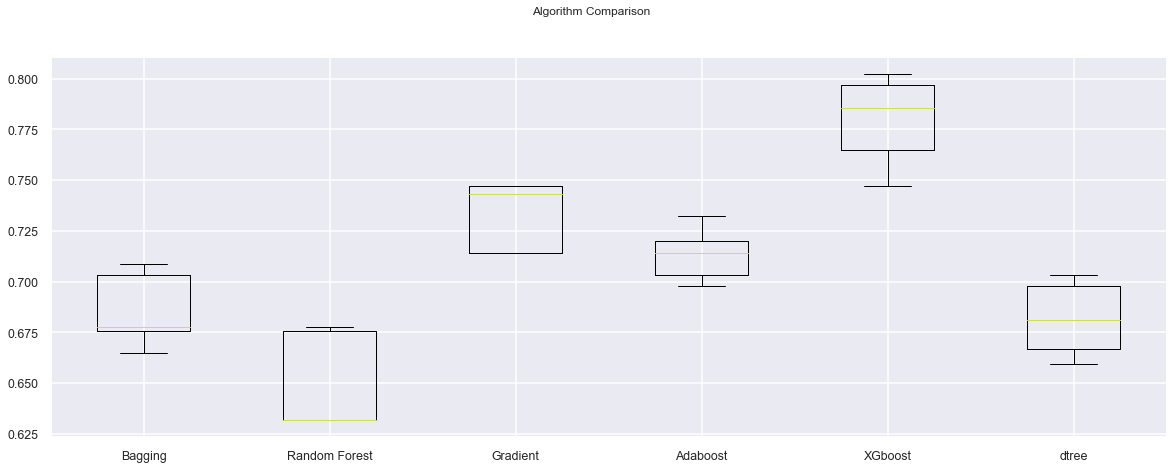

<IPython.core.display.Javascript object>

In [31]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoost is giving the highest cross validated recall, closely followed by Adaboost and GradientBoost
- Bagging, Randdom Forest, and Decision Tree models also have a decent initial performance, they do not appear to be overfit

### <a id= 'link20'>Model Building (Oversampled Data)</a>

In [32]:
# Oversampling the training data
sm = SMOTE(sampling_strategy=0.6, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

# Verifying the results
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(x_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 911
Before OverSampling, count of label '0': 4759 

After OverSampling, count of label '1': 2855
After OverSampling, count of label '0': 4759 

After OverSampling, the shape of train_X: (7614, 48)
After OverSampling, the shape of train_y: (7614,) 



<IPython.core.display.Javascript object>

In [33]:
# Performing the same loop for CV Scores with over sampled data
print("\n" "Cross-Validation Training Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name + " SMOTE")
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(x_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Training Performance:

Bagging: 90.40280210157619
Random Forest: 92.1891418563923
Gradient: 93.02977232924692
Adaboost: 91.76882661996497
XGboost: 93.76532399299474
dtree: 88.37127845884413

Validation Performance:

Bagging: 0.7698209718670077
Random Forest: 0.7621483375959079
Gradient: 0.8286445012787724
Adaboost: 0.8005115089514067
XGboost: 0.8158567774936062
dtree: 0.7544757033248082


<IPython.core.display.Javascript object>

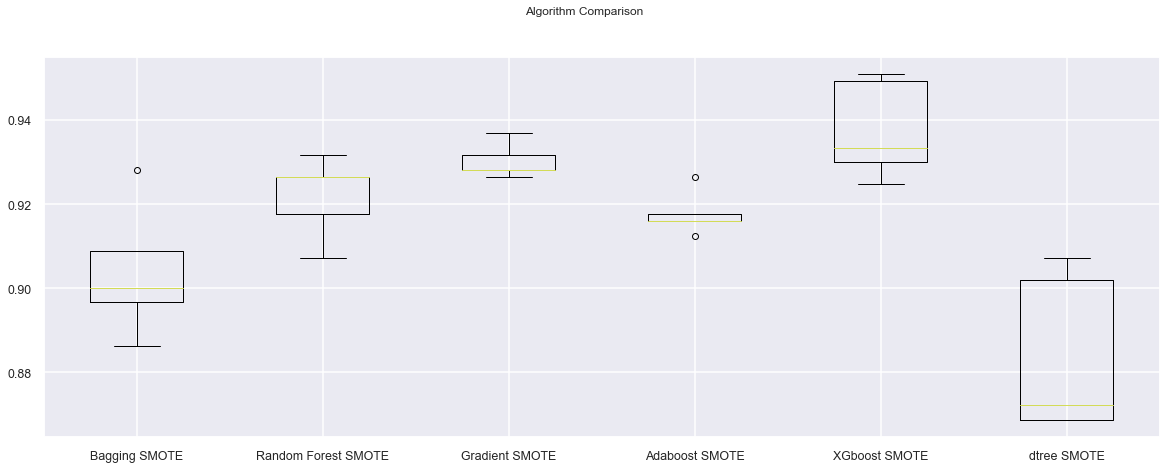

<IPython.core.display.Javascript object>

In [34]:
# Visualizing the Performance
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results[6:12])
ax.set_xticklabels(names[6:12])

plt.show()

- Model performance has improved significantly across all models, although they appear to be overfit
- All boosting classifiers remains the top three in recall CV performance

### <a id= 'link21'>Model Building (UnderSampling)</a>

In [35]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

<IPython.core.display.Javascript object>

In [36]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_under == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_under == 0)))

print("After Under Sampling, the shape of train_X: {}".format(x_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Under Sampling, count of label '1': 911
Before Under Sampling, count of label '0': 4759 

After Under Sampling, count of label '1': 911
After Under Sampling, count of label '0': 911 

After Under Sampling, the shape of train_X: (1822, 48)
After Under Sampling, the shape of train_y: (1822,) 



<IPython.core.display.Javascript object>

In [37]:
# Performing the same loop for CV Scores with under sampled data
print("\n" "Cross-Validation Training Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train_under, y=y_train_under, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name + " RUS")
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_under, y_train_under)
    scores = recall_score(y_val, model.predict(x_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Training Performance:

Bagging: 87.70852098720951
Random Forest: 92.75385816369423
Gradient: 92.86434876598811
Adaboost: 91.87834023899597
XGboost: 92.53768089833663
dtree: 82.43859965171441

Validation Performance:

Bagging: 0.9130434782608695
Random Forest: 0.9437340153452686
Gradient: 0.9360613810741688
Adaboost: 0.9028132992327366
XGboost: 0.9386189258312021
dtree: 0.8516624040920716


<IPython.core.display.Javascript object>

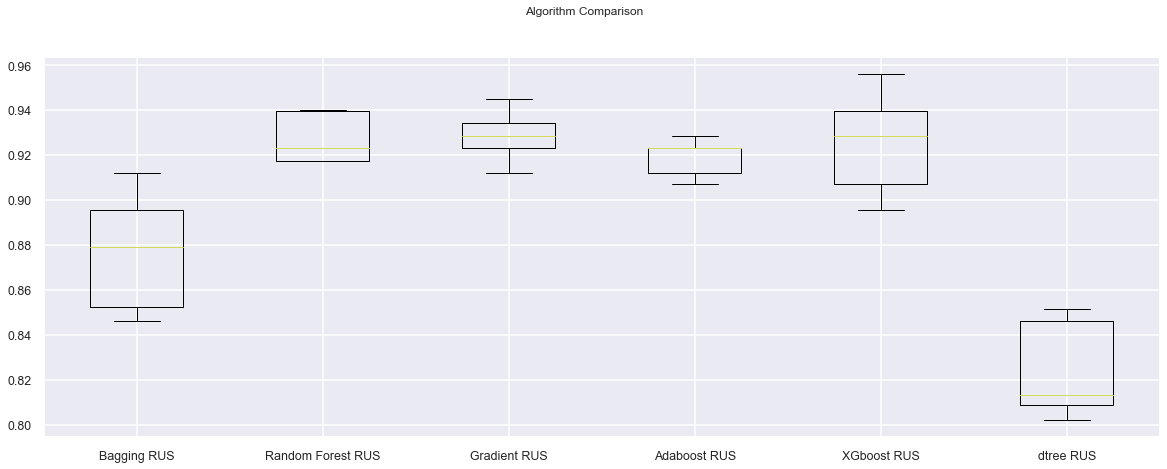

<IPython.core.display.Javascript object>

In [38]:
# Visualizing the Performance
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results[12:18])
ax.set_xticklabels(names[12:18])

plt.show()

- Overall recall performance of all models has increased with under sampled data without any apparent overfitting
- XGBoost maintains the best overall performance
- Random Forest has beaten out Gradient and AdaBoost with the use of undersampling

**<a id= 'link22'>Initial Model Comparison</a>**

In [39]:
# Combining list of arrays into an array of means (each array is averaged into it's own mean)
results = np.array(results).mean(1)

# Creating seperate training data frames for each model
initial_model_train_perf = pd.Series(data=results[0:6])
initial_model_train_perf = pd.DataFrame(initial_model_train_perf)

smote_model_train_perf = pd.Series(data=results[6:12])
smote_model_train_perf = pd.DataFrame(smote_model_train_perf)

rus_model_train_perf = pd.Series(data=results[12:18])
rus_model_train_perf = pd.DataFrame(rus_model_train_perf)

# Combining the training validation data frames
base_model_train_perf = pd.concat(
    [initial_model_train_perf, smote_model_train_perf, rus_model_train_perf], axis=1,
)
# Labeling the index and columns appropriatly
base_model_train_perf.index = [
    "Bagging",
    "Random Forest",
    "Gradiant",
    "AdaBoost",
    "XGBoost",
    "dtree",
]
base_model_train_perf.columns = ["Base Model", "SMOTE [0.6:1]", "RUS [1:1]"]

print("Training performance comparison:")
base_model_train_perf.T

Training performance comparison:


,Bagging,Random Forest,Gradiant,AdaBoost,XGBoost,dtree
Base Model,0.686,0.650,0.733,0.713,0.779,0.682
SMOTE [0.6:1],0.904,0.922,0.930,0.918,0.938,0.884
RUS [1:1],0.877,0.928,0.929,0.919,0.925,0.824


<IPython.core.display.Javascript object>

In [40]:
# Creating seperate validation data frames for each model
initial_model_val_perf = pd.Series(data=score[0:6])
initial_model_val_perf = pd.DataFrame(initial_model_val_perf)

smote_model_val_perf = pd.Series(data=score[6:12])
smote_model_val_perf = pd.DataFrame(smote_model_val_perf)

rus_model_val_perf = pd.Series(data=score[12:18])
rus_model_val_perf = pd.DataFrame(rus_model_val_perf)

# Combining the individual validation data frames
base_model_val_perf = pd.concat(
    [initial_model_val_perf, smote_model_val_perf, rus_model_val_perf], axis=1
)
# Labeling the index and columns appropriatly
base_model_val_perf.index = [
    "Bagging",
    "Random Forest",
    "Gradiant",
    "AdaBoost",
    "XGBoost",
    "dtree",
]
base_model_val_perf.columns = ["Base Model", "SMOTE [0.6:1]", "RUS [1:1]"]

print("Validation performance comparison:")
base_model_val_perf.T

Validation performance comparison:


,Bagging,Random Forest,Gradiant,AdaBoost,XGBoost,dtree
Base Model,0.719,0.726,0.788,0.754,0.811,0.726
SMOTE [0.6:1],0.770,0.762,0.829,0.801,0.816,0.754
RUS [1:1],0.913,0.944,0.936,0.903,0.939,0.852


<IPython.core.display.Javascript object>

- The top three models are Random Forest, XGBoost, and Gradient all which give a recall of 93%
- These models do not appear to be overfit when compared to the training scores
- All models performed best using RandomUnderSampler achieving recall scores within a range of 84.9% - 93.8%

### <a id= 'link23'>Model Tuning with Random Search CV</a>

Three models will be tuned using Random Search CV. Those models include Random Forest, Gradiant Boost, and XGBoost. All three models obtained a cross-validated recall score of 93% using undersampled data and do not appear to be overfit. Tuning should help identify which of the models is the best fit for our production line.

**<a id= 'link24'>Tuning Random Forest Classifier</a>**

In [41]:
# Choosing Classifier
rf = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(150, 250),
    "min_samples_leaf": np.arange(5, 20),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth": np.arange(3, 5),
    "class_weight": ["balanced", "balanced_subsample"],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Running RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
randomized_cv.fit(x_train_under, y_train_under)

# Set the clf to the best combination of parameters
rf_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(x_train_under, y_train_under)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(class_weight='balanced', max_depth=4,
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_estimators=232, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.894   0.944      0.858 0.899
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.838   0.957      0.497 0.654


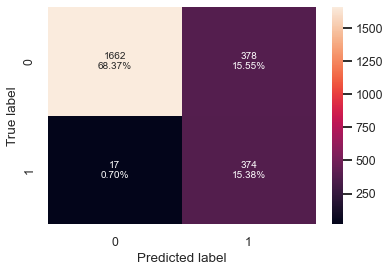

<IPython.core.display.Javascript object>

In [42]:
# Calculating different metrics
rf_tuned_train_perf = model_performance(rf_tuned, x_train_under, y_train_under)
print("Training performance:\n", rf_tuned_train_perf)

rf_tuned_val_perf = model_performance(rf_tuned, x_val, y_val)
print("Validation performance:\n", rf_tuned_val_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, x_val, y_val)

Performance on recall has increased slightly from 93%-95%. The model appears to be generalizing well and does not appear to be overfit. Precision seems to fall drastically from training to validation, but since this is not the desired metric, this doesn't seem to be an area of concern.

**<a id= 'link25'>Feature Importance for Random Forest</a>**

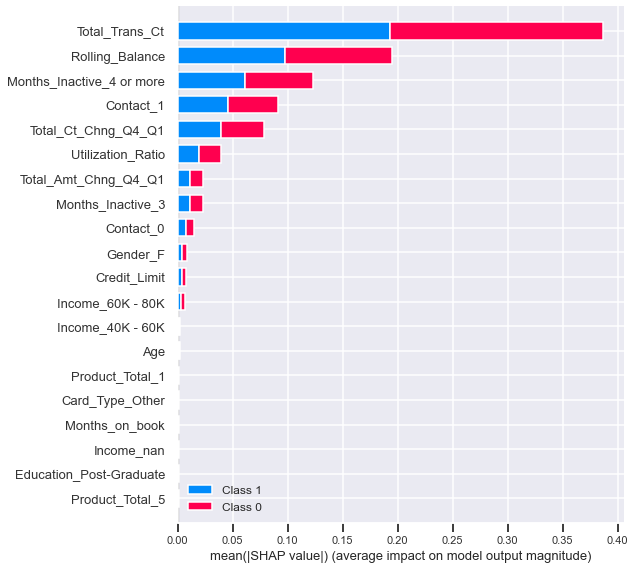

<IPython.core.display.Javascript object>

In [43]:
# OHE categorical variables for shap
x = pd.get_dummies(x)

# Calculating the shap values
explainer = shap.TreeExplainer(rf_tuned)
shap_values = explainer.shap_values(x)

# Making the plot
shap.summary_plot(shap_values, x)

Observations:
- Total_Trans_Ct is the primary feature
    - The higher the total transaction count, the more likely the customer is to keep their credit card
    - Conversely, the lower total transaction count, the more likely the customer is to cancel their credit card
- Rolling_Balance and Months_Inactive_4 are scondary features
    - As with total transaction count a higher number indicates staying with the bank, while a lower number indicates leaving

**<a id= 'link26'>Tuning Gradient Boosting Classifier</a>**

In [44]:
# Choosing Classifier
gbc = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(100, 250),
    "min_samples_leaf": np.arange(10, 60),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "learning_rate": np.arange(0.3, 0.7, 0.1),
    "subsample": np.arange(0.3, 0.7, 0.1),
    "max_depth": np.arange(2, 5),
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Running RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=100,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
randomized_cv.fit(x_train_under, y_train_under)

# Set the clf to the best combination of parameters
gbc_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train_under, y_train_under)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GradientBoostingClassifier(learning_rate=0.3, max_features=0.2,
                           min_impurity_decrease=0.01, min_samples_leaf=28,
                           n_estimators=215, random_state=1,
                           subsample=0.6000000000000001)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.997   1.000      0.995 0.997
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.900   0.913      0.632 0.747


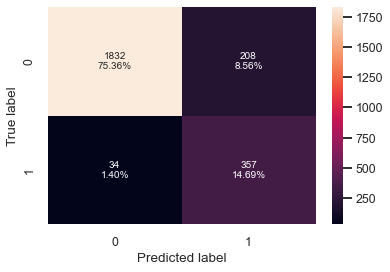

<IPython.core.display.Javascript object>

In [45]:
# Calculating different metrics
gbc_tuned_train_perf = model_performance(gbc_tuned, x_train_under, y_train_under)
print("Training performance:\n", gbc_tuned_train_perf)

gbc_tuned_val_perf = model_performance(gbc_tuned, x_val, y_val)
print("Validation performance:\n", gbc_tuned_val_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, x_val, y_val)

Recall performance has fallen from 93%-91% through the tuning process. Unforunately, the model appears to be overfitting across all metrics now that tuning has been performed.

**<a id= 'link27'>Feature Importance for Gradient Boosting Classifier</a>**

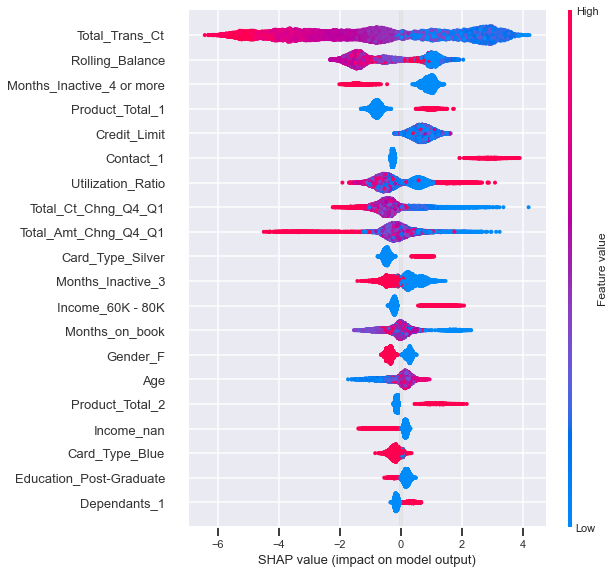

<IPython.core.display.Javascript object>

In [46]:
# Calculating the shap values
explainer = shap.TreeExplainer(gbc_tuned)
shap_values = explainer.shap_values(x)

# Making the plot
shap.summary_plot(shap_values, x)

Observations:
- Total_Trans_Ct, Rolling_Balance, and Months_Inactive_4 or more, are the top features in this model
    - High values in all three features had a negative impact on the model
        - i.e The higher the total transaction count and rolling balance, the less likely the customer was to cancel their credit card
    - Conversly, low values in all three features had a positive impact on the model
        - i.e The lower the total transaction count and rolling balance, coupled with an inactivity of 4 or more months, means the customer is more likely to cancel their credit card contributing to the attrition rate.

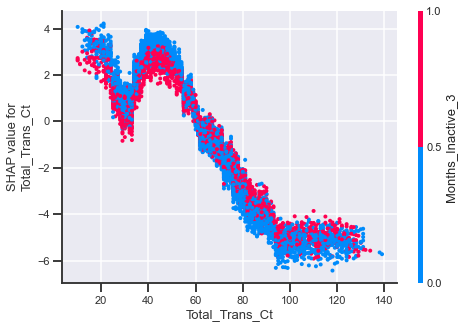

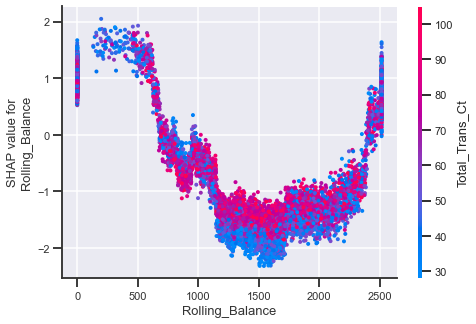

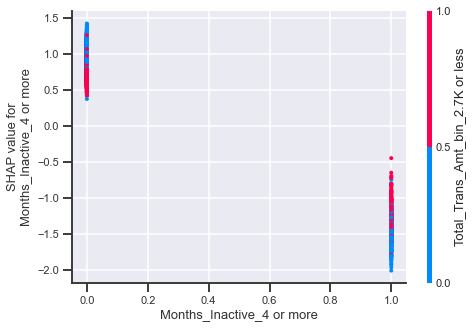

<IPython.core.display.Javascript object>

In [47]:
shap.dependence_plot("Total_Trans_Ct", shap_values, x)
shap.dependence_plot("Rolling_Balance", shap_values, x)
shap.dependence_plot("Months_Inactive_4 or more", shap_values, x)

Observations:
- Total_Trans_Count has mostly neagative linear relationship with our target and has interacts with 3 months of inactivity
- Rolling Balance has what appears to be a quadratic, or non-linear, relationship with our target variable.
    - Rolling_Balance also interacts with Total_Trans_Ct
- Months_Inactive has a binary relationship with our target variable. Inparticular, inactivity of split on the 4 month mark interacts significantly with a Total_Trans_Amt of 2.7K or less.

**<a id= 'link28'>Tuning XGBoost Classifier</a>**

In [48]:
# Choosing Classifier
xgb = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "colsample_bylevel": np.arange(0.3, 0.7, 0.1),
    "colsample_bynode": np.arange(0.3, 0.7, 0.1),
    "colsample_bytree": np.arange(0.3, 0.7, 0.1),
    "learning_rate": np.arange(0.5, 0.9, 0.1),
    "max_depth": np.arange(2, 5, 1),
    "n_estimators": np.arange(10, 150, 1),
    "subsample": np.arange(0.3, 0.7, 0.1),
}

# Scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Running RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
randomized_cv.fit(x_train_under, y_train_under)

# Set the clf to the best combination of parameters
xgb_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train_under, y_train_under)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.6000000000000001,
              colsample_bynode=0.6000000000000001, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=119, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6000000000000001,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.952   0.960      0.944 0.952
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.900   0.916      0.631 0.747


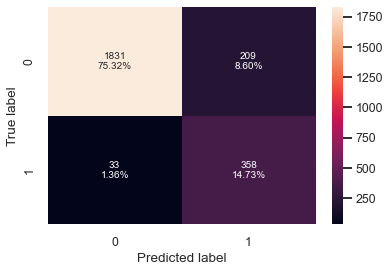

<IPython.core.display.Javascript object>

In [49]:
# Calculating different metrics
xgb_tuned_train_perf = model_performance(xgb_tuned, x_train_under, y_train_under)
print("Training performance:\n", xgb_tuned_train_perf)

xgb_tuned_val_perf = model_performance(xgb_tuned, x_val, y_val)
print("Validation performance:\n", xgb_tuned_val_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, x_val, y_val)

XGBoost is performing well. The model *may* be slightly overfit. A final check on the testing data will determine this.

**<a id= 'link29'>Feature Importance for XGBClassifier</a>**

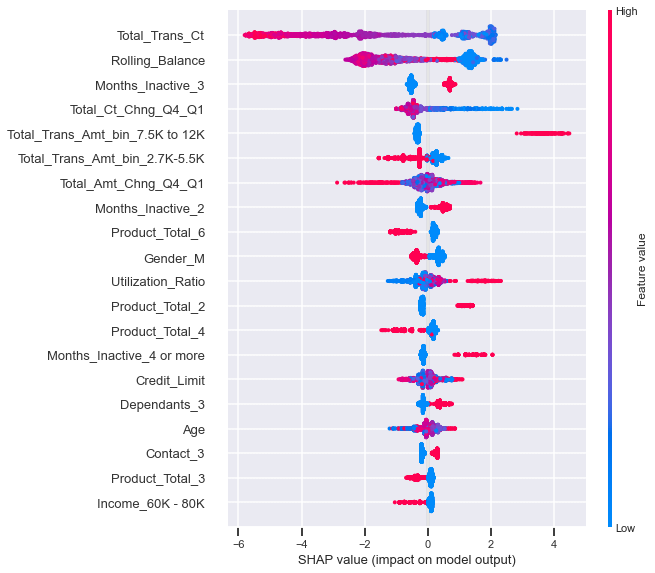

<IPython.core.display.Javascript object>

In [50]:
# Calculating the shap values
explainer = shap.TreeExplainer(xgb_tuned)
shap_values = explainer.shap_values(x_val)

# Making the plot
shap.summary_plot(shap_values, x_val)

Unsuprisingly, Total_Trans_Ct and Rolling_Balance remain the top features of importance. The threshold for inactivity has fallen from 4 or more to just 3. Overall, there is no significant changes in the order of importance for the remaining features or their relationships to the target variable.

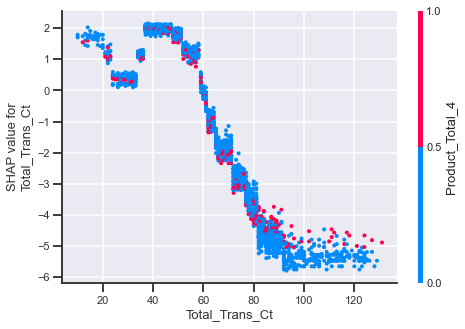

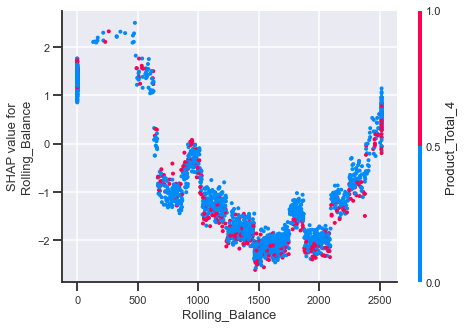

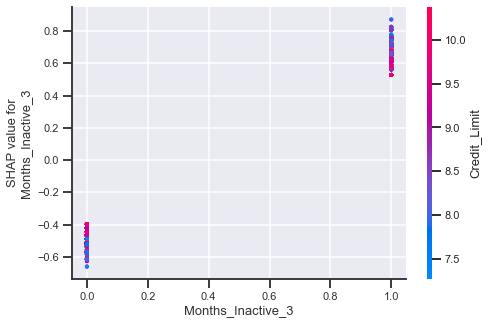

<IPython.core.display.Javascript object>

In [51]:
shap.dependence_plot("Total_Trans_Ct", shap_values, x_val)
shap.dependence_plot("Rolling_Balance", shap_values, x_val)
shap.dependence_plot("Months_Inactive_3", shap_values, x_val)

Dependancies for the top three features in XGBoost are in line with previous observations. No signifcant changes are observed.

### <a id= 'link30'>Final Tuned Model Comparisons</a>

In [52]:
# Checking model tess results before final comparison
rf_tuned_test_perf = model_performance(rf_tuned, x_test, y_test)
print("Random Forest Testing Performance:\n", rf_tuned_test_perf)

gbc_tuned_test_perf = model_performance(gbc_tuned, x_test, y_test)
print("Gradient Testing Performance:\n", gbc_tuned_test_perf)

xgb_tuned_test_perf = model_performance(xgb_tuned, x_test, y_test)
print("XGBoost Testing Performance:\n", xgb_tuned_test_perf)

Random Forest Testing Performance:
    Accuracy  Recall  Precision    F1
0     0.845   0.951      0.509 0.663
Gradient Testing Performance:
    Accuracy  Recall  Precision    F1
0     0.909   0.935      0.651 0.768
XGBoost Testing Performance:
    Accuracy  Recall  Precision    F1
0     0.910   0.938      0.653 0.770


<IPython.core.display.Javascript object>

Random Forest is still the best overall model. Followed closely by the XGBoost

In [53]:
# Model performance comparison
final_model_comp_df = pd.concat(
    [
        rf_tuned_train_perf.T,
        rf_tuned_val_perf.T,
        rf_tuned_test_perf.T,
        gbc_tuned_train_perf.T,
        gbc_tuned_val_perf.T,
        gbc_tuned_test_perf.T,
        xgb_tuned_train_perf.T,
        xgb_tuned_val_perf.T,
        xgb_tuned_test_perf.T,
    ],
    axis=1,
)
final_model_comp_df.columns = [
    "Random Forest Training",
    "Random Forest Validation",
    "Random Forest Testing",
    "Gradient Training",
    "Gradient Validation",
    "Gradient Testing",
    "XGBoost Training",
    "XGBoost Validation",
    "XGBoost Testing",
]
print("Final Model Comparison:")
final_model_comp_df

Final Model Comparison:


,Random Forest Training,Random Forest Validation,Random Forest Testing,Gradient Training,Gradient Validation,Gradient Testing,XGBoost Training,XGBoost Validation,XGBoost Testing
Accuracy,0.894,0.838,0.845,0.997,0.900,0.909,0.952,0.900,0.910
Recall,0.944,0.957,0.951,1.000,0.913,0.935,0.960,0.916,0.938
Precision,0.858,0.497,0.509,0.995,0.632,0.651,0.944,0.631,0.653
F1,0.899,0.654,0.663,0.997,0.747,0.768,0.952,0.747,0.770


<IPython.core.display.Javascript object>

The Random Forest Classifier is the overall best fit for the data with a hyper-consistent recall value of 95%. The XGBoost however is providing a more generalized performance overall, with only a 1% reduction in recall performance. Initially it seemed as if the XGBoost was overfitting, but that does not seem to be the case when comparing training recall performance to the testing data. Lastly, The Gradient Boosting Classifier had the most variablity in performance as well as the most issues with overfitting, thus we will not consider this model for production. 

Therefore, the two models for consideration are the Random Forest and XGBoost classifiers. Random Forest provides a more consistent recall value, but is less generalized in its overall performance. The XGBoost has slightly more variablility in its recall value, but is providing a more generalized performance in all other metrics. To make a final decision on which model to pick, both models will be run through the final pipeline to determine a difference, if any.

### <a id= 'link31'>Pipeline Production</a>

In [54]:
# Encoding Target variable with 0 and 1
df.Attrition_Flag.replace(
    {"Attrited Customer": "1", "Existing Customer": "0"}, inplace=True
)

# Separating target variable and other variables
x = df.drop(columns="Attrition_Flag")
y = df["Attrition_Flag"].astype("int64")

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1, stratify=y
)

# Fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

<IPython.core.display.Javascript object>

**<a id= 'link32'>Creating Preproccessor</a>**

In [55]:
# Creating function to handle all data cleaning and pre-processing that was performed on the original dataframe
def DataCleaningSteps(df):
    # Reformatting column names
    df.rename(
        columns={
            "Customer_Age": "Age",
            "Dependent_count": "Dependants",
            "Education_Level": "Education",
            "Marital_Status": "Married",
            "Income_Category": "Income",
            "Card_Category": "Card_Type",
            "Total_Relationship_Count": "Product_Total",
            "Months_Inactive_12_mon": "Months_Inactive",
            "Contacts_Count_12_mon": "Contact",
            "Total_Revolving_Bal": "Rolling_Balance",
            "Avg_Utilization_Ratio": "Utilization_Ratio",
        },
        inplace=True,
    )

    # Reformatting variables in Income column
    df.Income.replace(
        {
            "abc": np.nan,
            "Less than $40K": "40K or less",
            "$40K - $60K": "40K - 60K",
            "$60K - $80K": "60K - 80K",
            "$80K - $120K": "80K - 120K",
            "$120K +": "$120K or more",
        },
        inplace=True,
    )

    # Creating bins for Total Transaction Amount
    df["Total_Trans_Amt_bin"] = pd.cut(
        df["Total_Trans_Amt"],
        [0, 2700, 5500, 7500, 12000, 19000],
        labels=["2.7K or less", "2.7K-5.5K", "5.5K-7.5K", "7.5K to 12K", "12K or more"],
    )

    # Ensuring all categorical columns are of the object dtype
    cat_cols = [
        "Gender",
        "Dependants",
        "Education",
        "Married",
        "Income",
        "Card_Type",
        "Product_Total",
        "Months_Inactive",
        "Contact",
        "Total_Trans_Amt_bin",
    ]

    for colname in cat_cols:
        df[colname] = df[colname].astype("str")

    # Combining Gold and Platinum Card Types into "Other"
    for col_val in df[["Card_Type"]]:
        val = df[col_val].value_counts(normalize=True)
        y = val[val < 0.05].index
        df[col_val] = df[col_val].replace({x: "Other" for x in y})

    # Combining 4, 5, and 6 months inactive into "4 or more"
    for col_val in df[["Months_Inactive"]]:
        val = df[col_val].value_counts(normalize=True)
        y = val[val < 0.05].index
        df[col_val] = df[col_val].replace({x: "4 or more" for x in y})

    # Dropping non-required columns
    df.drop(
        columns=["CLIENTNUM", "Avg_Open_To_Buy", "Total_Trans_Amt"], axis=1,
    )

    return df

<IPython.core.display.Javascript object>

In [56]:
# Passing our function as an argument to the FunctionTransformer and storing it as a global variable
preprocessing = FunctionTransformer(DataCleaningSteps)

<IPython.core.display.Javascript object>

**<a id= 'link33'>Creating Imputation Encoder</a>**

In [57]:
# Creating individual pipeline for any missing numerical/categorical variables
numerical_transformer = make_pipeline(SimpleImputer(strategy="median"))
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
)

# Combining categorical transformer and numerical transformer using a column transformer
imputation_encoding = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, selector(dtype_exclude="object"),),
        ("cat", categorical_transformer, selector(dtype_include="object")),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

**<a id= 'link34'>Defining Models</a>**

In [58]:
# Defining models to be used for the pipeline

rf_model = RandomForestClassifier(
    class_weight="balanced_subsample",
    max_depth=3,
    max_features=0.5,
    max_samples=0.6,
    min_impurity_decrease=0.001,
    min_samples_leaf=5,
    n_estimators=208,
    random_state=1,
)

xgb_model = XGBClassifier(
    colsample_bylevel=0.6,
    colsample_bynode=0.4,
    colsample_bytree=0.6,
    eval_metric="logloss",
    learning_rate=0.5,
    max_depth=2,
    n_estimators=104,
    random_state=1,
    subsample=0.4,
)

<IPython.core.display.Javascript object>

**<a id= 'link35'>Running the Pipeline</a>**

In [59]:
# Creating the final pipeline(s)
rf_model_pipeline = make_pipeline(preprocessing, imputation_encoding, rf_model)
xgb_model_pipeline = make_pipeline(preprocessing, imputation_encoding, xgb_model)

<IPython.core.display.Javascript object>

In [60]:
# Fitting Random Forest Classifier
rf_model_pipeline.fit(x_train_under, y_train_under)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function DataCleaningSteps at 0x0000022683C5D9D0>)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022686CAD910...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022686CAD8E0>)])),
                ('randomforestclassifier',
 

<IPython.core.display.Javascript object>

In [61]:
# Fitting XGBoost Classifier
xgb_model_pipeline.fit(x_train_under, y_train_under)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function DataCleaningSteps at 0x0000022683C5D9D0>)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022686CAD910...
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.5, max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=104,
     

<IPython.core.display.Javascript object>

**<a id= 'link36'>Pipeline Model Performance Comparison</a>**

In [62]:
# Generating performance scores for both production models
rf_model_train_perf = model_performance(rf_model_pipeline, x_train_under, y_train_under)
rf_model_test_perf = model_performance(rf_model_pipeline, x_test, y_test)
xgb_model_train_perf = model_performance(
    xgb_model_pipeline, x_train_under, y_train_under
)
xgb_model_test_perf = model_performance(xgb_model_pipeline, x_test, y_test)


# Production Model performance comparison
production_model_comp_df = pd.concat(
    [
        rf_model_train_perf.T,
        rf_model_test_perf.T,
        xgb_model_train_perf.T,
        xgb_model_test_perf.T,
    ],
    axis=1,
)
production_model_comp_df.columns = [
    "Random Forest Training",
    "Random Forest Testing",
    "XGB Training",
    "XGB Testing",
]
print("Production Model Comparison:")
production_model_comp_df

Production Model Comparison:


,Random Forest Training,Random Forest Testing,XGB Training,XGB Testing
Accuracy,0.886,0.849,0.964,0.932
Recall,0.936,0.918,0.969,0.936
Precision,0.851,0.517,0.959,0.721
F1,0.892,0.662,0.964,0.815


<IPython.core.display.Javascript object>

Both models have done well on the final performance check and results are nearly identical to their manually tuned versions. Random Forest achieved a 93% in recall in training with only a 2% decrease in testing. Random Forest, also generalized well for the most part, although precision performance is a little underwhelming. XGBoost outperformed Random Forest with a 96.9% in recall in training and 3.3% decrease in testing. Overall, XGBoost is generalizing much better than Random Forest across all other metrics. Therefore, XGBoost will be the final model used in production.

### <a id= 'link37'>Conclusion</a>

**<a id= 'link38'>Final Model Overview</a>**

During the initial model building six different models were built:  Bagging, Random Forest, Decision Tree, AdaBoost, Gradient Boost, and XGBoost. The initial base performances were compared with stratified target variables followed by comparisons with oversampled and undersampled data. All base models performed best on the undersampled datasets. Lastly, the best base model performances were compared and the top three models to use for tuning were chosen based on performance in recall. These three models included Random Forest, Gradient Boost, and XGBoost.

Next, hyperparameter tuning was performed using RandomizedSearchCV across all available hyperparameters for each algorithm. Additionally, the models feature's importance was viewed and the top three features dependancies were plotted as well. Upon comparing performance, Random Forest had the highest recall. XGBoost however, achieved a similar recall performance along with better overall generalization of all other metrics. To determine the model for final production Random Forest and XGBoost were compared through their pipeline performances. After this final comparison, XGBoost was chosen due its greater overall generalization while achieving similar recall values to the Random Forest.

**<a id= 'link39'>Key Insights</a>**

- Total Transaction Count is the most important feature according to our models
    - Those with lower transaction counts are more likely to quit using their credit cards
- Rolling Balance and Inactivity are the second most important features according to our models
    - The lower the rolling balance, the higher chance the customer will stop using their credit card
        - A significant portion of customers have a rolling balance of 0. This *may* be do to improper data entry, or simply that some clients are in the habit of paying off their credit each month. It is impossible to say without more information.
    - Unsuprisingly, the longer the inactivity continues the more likely the customer is to contribute to attrition
        - The threshold seems to be at least 3 months
- Those with platinum and gold cards appear marginally more likely to leave the bank
    - Less than 5% of customers own these card types
- The likelihood of attrition increases significantly with each additional contact with the bank
    - i.e The more problems the customer runs into that require contacting the bank to resolve, the more likely they are to stop using the service.
- Total transactions amounts of 7.5K-12k and 2.7K or less are significantly more likely to leave the bank than other transaction groups
- The credit limit for those who leave the bank is marginally lower than those who do not
- Customers who have a lower total transaction amount are more likely to leave the bank
- The total count change from Q4 to Q1 is moderately lower for those that leave the bank
- The utilization ratio of those leave the bank does not exceed 20% of their credit limit on average

**<a id= 'link40'>Business Recomendations</a>**

Based on the EDA and modeling insights the following business reccomendations can be made:


- Low total transaction counts is the highest indicator of a customer contributing to attirition. The most obvious solution is some form of points reward system, however further brainstorming and research would be needed to determine the best course of action.


- Rolling Balance is the second most important indicator for customer attrition. Unsuprisingly, those who do not use their credit cards will not have a recurring credit balance and thus will have a lower overall rolling balance. As suggested before, the customer should feel that having and using a credit card is beneficial to them. The more value the customer associaties with using their credit card the lower the attrition rate will be.


- Inactivity is the third most important indicator for customer attrition. As one might suspect, the less a customer uses their credit card, the more likely they will contribute to attrition. The threshold for inactivity appears to be a minimum of three months. Previous business reccomendations for total transaction count and rolling balance also apply here.


- The more customers contact the bank the more the attirition rate goes up. This implies some customers have greater frustration over various issues with the banks services. The issues in question could be due to a multitude of reasons, all of which would be speculation at this time. An investigation into the nature of the calls would be needed to determine this. In general, the bank should focus on streamlining their customer service as much as possible, while creating the maximum ease of use, and in theory this should help reduce customer frustations.


- Of the four types of credit cards available to customers, the blue card is the most used. Interestingly, the gold and platinum cards, which make up only 5% of all cards used, are more likely to contribute to attrition. This suggests the percieved benefit of owning those types of credit cards is much less than that of the standard blue type. The bank may want to consider either removing the cards from service if they are not generating enough value or generating more value for the customers who use those card types to hlep mitigate attrition.


- Other features such as gender, income, dependants, etc. only marginally contribute to prediciting whether a customer will cancel their credit card or not. They do not appear to be significant enough for further analysis currently and thus can safely be ignored within this specific context.


Overall, the general customer profile for those most likely to commit attrition is the customers with the least amount of activity for their credit card. This lack of use will contribute to lower amount of transactions and along with a lower rolling balance. These three features(total transaction count, rolling balance, and months of inactivity) are the most valued by the model for predicting whether a customer will contribute to attrition or not. 

Given this knowledge the bank has a variety of options. They can focus on making their credit cards more appealing to use through various rewards programs. The bank may also want to consider making each card type more distinct in the value they provide as the vast majority of customers appear to be only using the most basic card type, and in some cases, the card type is actually an indicator of attrition. Additionally, the bank should seek to lower the  barrier for acquiring a credit card and make the ease of use as high as possible. This should reduce the customers need to contact the bank to resolve issues, which is another indicator for attrition as well as increase it's overall customer base.